# KARINA FRANCIELI SCHMIDT - 2023314

## Data Visualization Techniques, Machine Learning for Business 

### Dr. Muhammad Iqbal / David Mc Quaid

Integrated CA2

In [1]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler

Code below to read the dataframe file.

In [2]:
df = pd.read_csv('customer_shopping_data.csv')

Below we can quickly visualise the data, the column names and the first rows

In [3]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


The '.shape' code shows the total number of rows and columns in the dataframe

In [4]:
print(df.shape)


(99457, 10)


Below are all the names of the columns that.

In [5]:
print(df.columns)

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')


With df.info() it shows a summary that includes information for each column, such as null values, and data type (int, float, object).
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


This code is for printing the number of missing values. In this dataset, we don't have any missing values, because all the columns have the value 0.

In [7]:
# Missing value
valores_faltantes = df.isnull().sum()

print(valores_faltantes)

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64


Below is a statistical summary to understand the distribution and dispersion of the numerical data in each column.

In [8]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [9]:
# Generating descriptive statistics of the dataset
df.describe(include='all')

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457.000000,99457,99457.000000,99457.000000,99457,99457,99457
unique,99457,99457,2,NaN,8,NaN,NaN,3,797,10
top,I138884,C241288,Female,NaN,Clothing,NaN,NaN,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,NaN,34487,NaN,NaN,44447,159,19943
mean,NaN,NaN,NaN,43.427089,NaN,3.003429,689.256321,NaN,NaN,NaN
std,NaN,NaN,NaN,14.990054,NaN,1.413025,941.184567,NaN,NaN,NaN
min,NaN,NaN,NaN,18.000000,NaN,1.000000,5.230000,NaN,NaN,NaN
25%,NaN,NaN,NaN,30.000000,NaN,2.000000,45.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,43.000000,NaN,3.000000,203.300000,NaN,NaN,NaN
75%,NaN,NaN,NaN,56.000000,NaN,4.000000,1200.320000,NaN,NaN,NaN


    Above, have historiograms of the distribution of purchases for some of the columns. For age, the graph shows that we have a uniform distribution, with an average age of 43. For quantity, we can see that the purchase of 2 to 4 items is common among consumers. While one and five items are the least frequent, this shows that customers usually buy few items on each trip to the shopping centre. The price histogram is skewed to the right, showing that most purchases are at the lower end of the price spectrum, with fewer high-value transactions. This is typical in retail environments, where lower-priced items are bought more frequently.
	When it comes to buying products, the number of purchases made by women is infinitely higher when compared to those made by men. In terms of payment methods, customers often pay in cash, followed by credit cards and debit cards, even taking into account the country's habits of preferring to pay in cash or by card. And finally, the graph of the distribution of purchases in the different shopping malls shows that the two with the highest number of purchases are Mall of Istanbul and Kanyon, there are several values that can lead to the number of purchases in these two shopping malls, being location, size, type of shop and whether or not there are restaurants (places to eat).

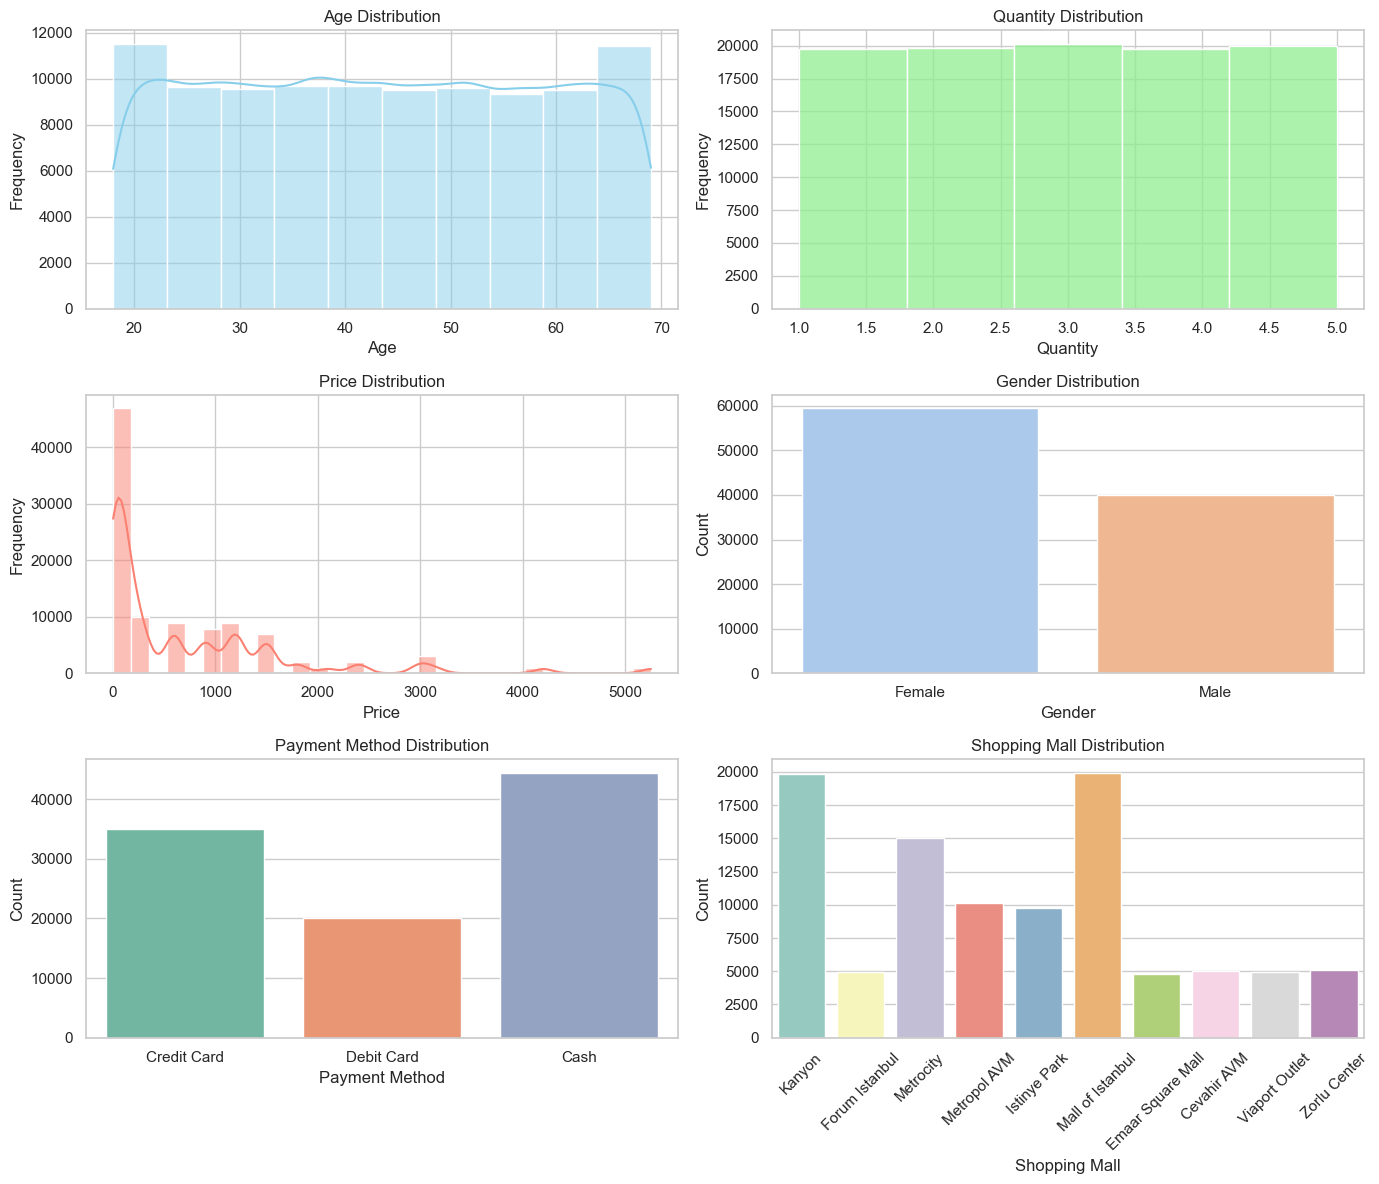

In [10]:
# Ensure the style is set for better visualization
sns.set(style="whitegrid")

# Create a figure with multiple subplots arranged in a grid
fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Adjusting figure size for a better fit

# Plot for Age Distribution
sns.histplot(data=df, x='age', bins=10, kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# Plot for Quantity Distribution
sns.histplot(data=df, x='quantity', bins=5, kde=False, ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Quantity Distribution')
axes[0, 1].set_xlabel('Quantity')
axes[0, 1].set_ylabel('Frequency')

# Plot for Price Distribution
sns.histplot(data=df, x='price', bins=30, kde=True, ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Price Distribution')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')

# Plot for Gender Distribution
sns.countplot(data=df, x='gender', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Gender Distribution')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Count')

# Plot for Payment Method Distribution
sns.countplot(data=df, x='payment_method', palette='Set2', ax=axes[2, 0])
axes[2, 0].set_title('Payment Method Distribution')
axes[2, 0].set_xlabel('Payment Method')
axes[2, 0].set_ylabel('Count')

# Plot for Shopping Mall Distribution
sns.countplot(data=df, x='shopping_mall', palette='Set3', ax=axes[2, 1])
axes[2, 1].set_title('Shopping Mall Distribution')
axes[2, 1].set_xlabel('Shopping Mall')
axes[2, 1].set_ylabel('Count')
axes[2, 1].tick_params(axis='x', rotation=45)  # Rotate labels for better readability

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

Transforming some categorical columns into numerical ones is often necessary to make the data suitable for algorithms that require numerical input, improving the versatility of the dataset for various analyses and machine learning models. In this way, the 'gender' column was transformed into a numeric column where a row in the 'gender' column with the value 'Female' was replaced by 0, and a row in the 'gender' column with the value 'Male' was replaced by 1.

In [11]:
# Creating a gender mapping to numbers
gender_mapping = {'Female': 0, 'Male': 1}

# Applying the mapping to transform gender values into integers
df['gender_int'] = df['gender'].map(gender_mapping)

# Checking the transformations
df[['gender', 'gender_int']].head()

,gender,gender_int
0,Female,0
1,Male,1
2,Male,1
3,Female,0
4,Female,0


## Total sale stats by gender

In [12]:
# Calculating the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Grouping the data by gender and obtaining descriptive statistics
stats_by_gender = df.groupby('gender')['total_sales'].describe()

# Displaying the descriptive statistics
print(stats_by_gender)

          count         mean          std   min     25%     50%      75%  \
gender                                                                     
Female  59482.0  2525.253623  4226.617822  5.23  136.35  600.17  2700.72   
Male    39975.0  2534.050237  4216.352329  5.23  130.75  600.17  2700.72   

            max  
gender           
Female  26250.0  
Male    26250.0  


In [13]:
# Calculating the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Grouping the data by age and obtaining descriptive statistics
stats_by_age = df.groupby('age')['total_sales'].describe()

# Displaying the descriptive statistics
print(stats_by_age)

      count         mean          std   min       25%     50%      75%  \
age                                                                      
18   1844.0  2384.880835  3984.756235  5.23  136.3500  573.44  2700.72   
19   1936.0  2403.584003  3884.889153  5.23  141.6075  600.17  2700.72   
20   1844.0  2498.819875  4101.978243  5.23  130.7500  573.44  2700.72   
21   1947.0  2494.174838  4163.498999  5.23  143.3600  600.17  2700.72   
22   2051.0  2539.659391  4343.772540  5.23  143.3600  650.56  2700.72   
23   1897.0  2450.074544  4103.851863  5.23  130.7500  600.17  2700.72   
24   1977.0  2570.768791  4322.038140  5.23  130.7500  600.17  2700.72   
25   1863.0  2503.589630  4125.471617  5.23  136.3500  600.17  2700.72   
26   1896.0  2627.328492  4393.804554  5.23  130.7500  600.17  2700.72   
27   1950.0  2652.235415  4308.580655  5.23  136.3500  650.56  4200.00   
28   1953.0  2529.511224  4186.083347  5.23  136.3500  600.17  2700.72   
29   1885.0  2590.858790  4261.996393 

### Avarege sales per age

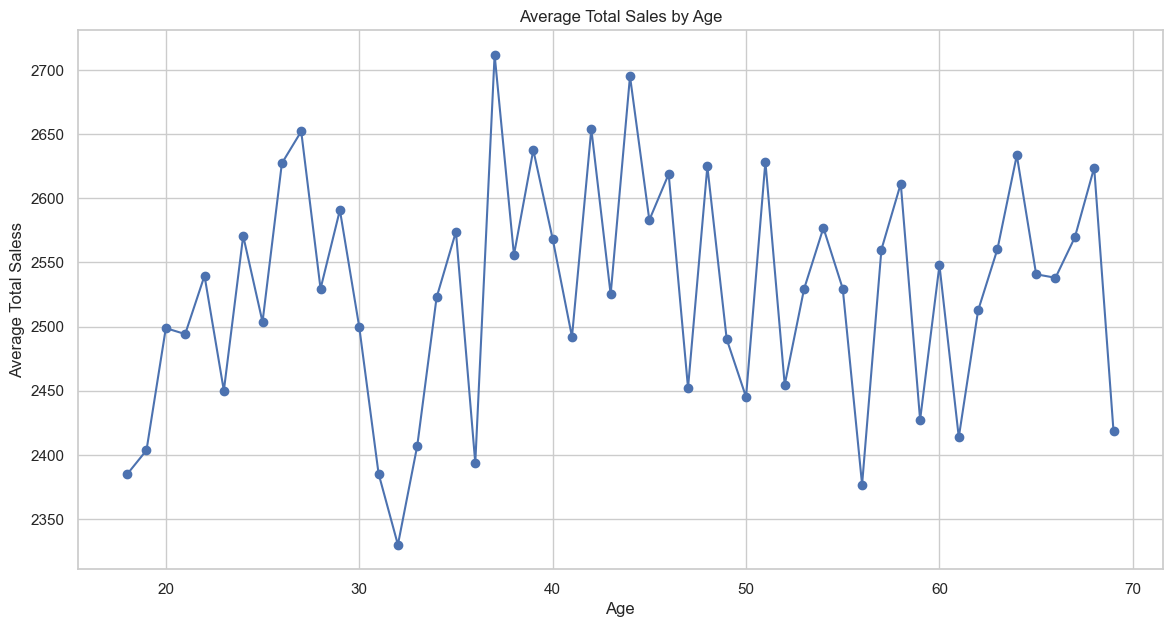

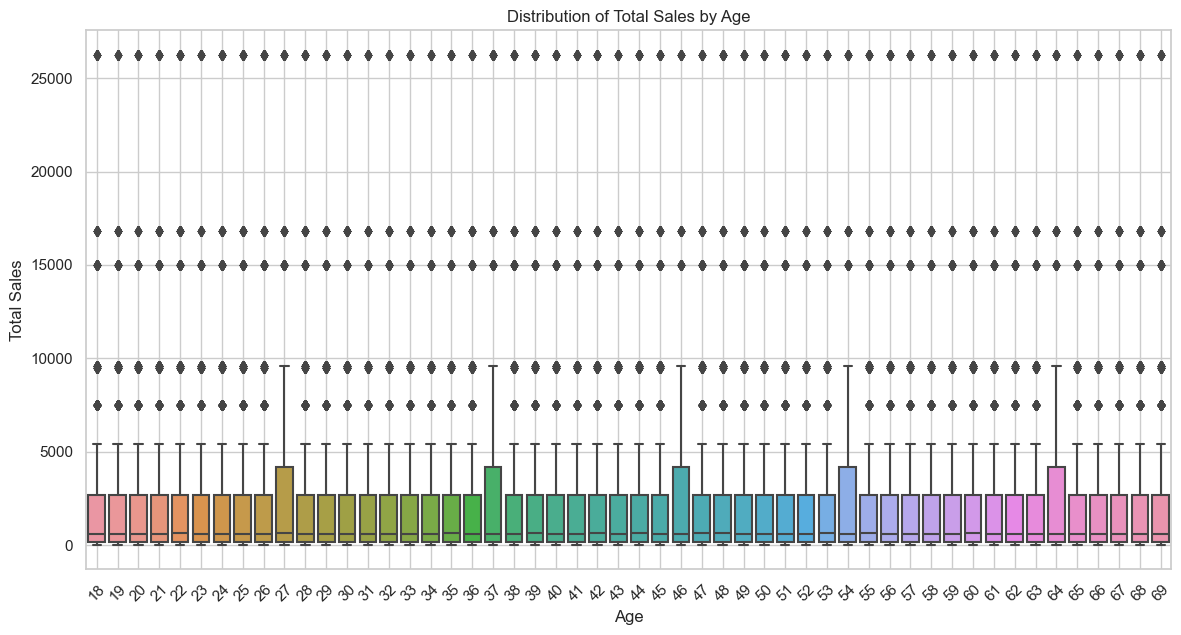

In [14]:

# Gráfico de Linha para Médias de Vendas por Idade
plt.figure(figsize=(14, 7))
plt.plot(stats_by_age.index, stats_by_age['mean'], marker='o', linestyle='-', color='b')
plt.title('Average Total Sales by Age')
plt.xlabel('Age')
plt.ylabel('Average Total Saless')
plt.grid(True)
plt.show()

# Boxplot para Distribuição do Total de Vendas por Idade
plt.figure(figsize=(14, 7))
sns.boxplot(x='age', y='total_sales', data=df)
plt.title('Distribution of Total Sales by Age')
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)
plt.show()

Evaluating the descriptive statistical analysis, shows that the lowest sales value is 5.23 and the highest is 26,250.00. The average is 2,528.90, which shows the weighted average point. The median sales value is 600.00. This shows that half of all sales are lower than this value and the other half are higher. In the 25% quantile the sales values are less than 136.00 and the 75% quantile the sales values are less than 2700.00.

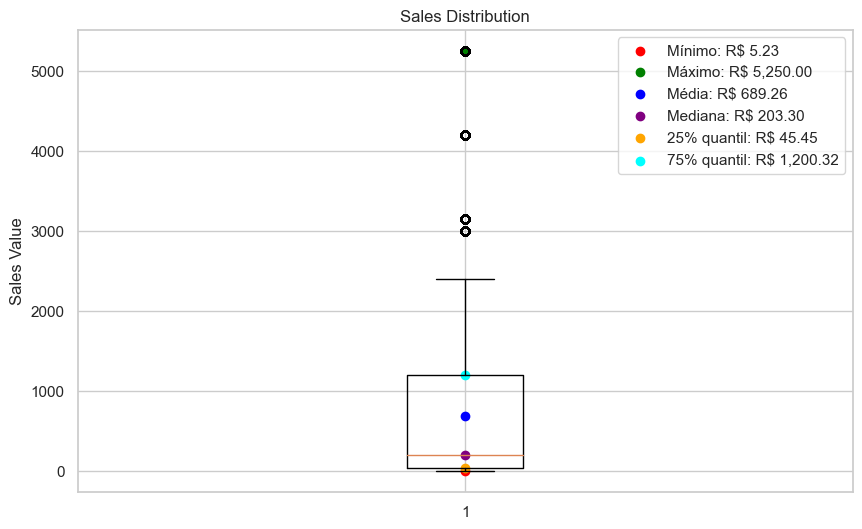

In [15]:
# Assuming that df is your DataFrame and 'sales' is the column with the sales data
plt.figure(figsize=(10, 6))  
plt.boxplot(df['price'])  
plt.title('Sales Distribution')  
plt.ylabel('Sales Value')  

# Adds information about descriptive statistical analysis
plt.scatter(1, df['price'].min(), color='red', label=f"Mínimo: R$ {df['price'].min():,.2f}")
plt.scatter(1, df['price'].max(), color='green', label=f"Máximo: R$ {df['price'].max():,.2f}")
plt.scatter(1, df['price'].mean(), color='blue', label=f"Média: R$ {df['price'].mean():,.2f}")
plt.scatter(1, df['price'].median(), color='purple', label=f"Mediana: R$ {df['price'].median():,.2f}")
plt.scatter(1, df['price'].quantile(0.25), color='orange', label=f"25% quantil: R$ {df['price'].quantile(0.25):,.2f}")
plt.scatter(1, df['price'].quantile(0.75), color='cyan', label=f"75% quantil: R$ {df['price'].quantile(0.75):,.2f}")

plt.legend()  

plt.show()  

## Total sale by gender

As shown above, the frequency of purchases by women at shopping centres in Istanbul is higher when compared to men. Also shows the most common items bought by both genders. So, when we compare the genders with the shopping categories, we see a pattern of purchases, with both having a higher frequency of purchases, the three most commonly bought being: clothing, cosmetics, food & beverage and shoes. Women spent 68251695.60 on clothing, 4066772.54 on cosmetics and 505322.60 on food & beverage.

In [16]:
# Calculate the total sales per purchase
df['total_sales'] = df['quantity'] * df['price']

# Group the data by gender and calculate the total sales
total_sales_by_gender = df.groupby('gender')['total_sales'].sum()

The graph comparing total sales and gender shows that sales are higher among women.
For women approximately 140,000,000 while for men 100,0000,000.

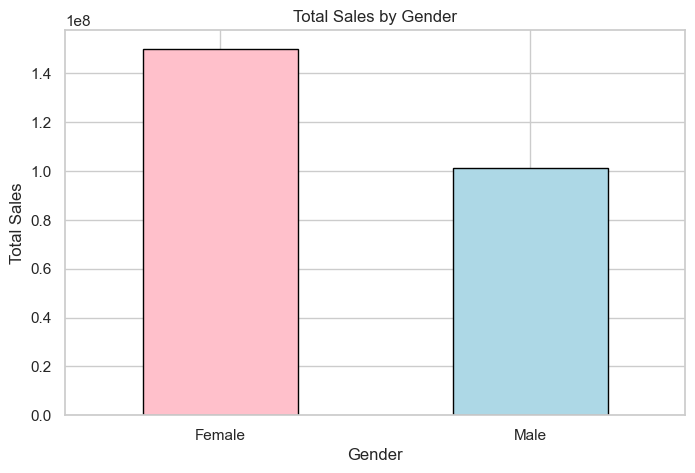

gender
Female    1.502071e+08
Male      1.012987e+08
Name: total_sales, dtype: float64

In [17]:
# Plotting the bar plot for total sales by gender
plt.figure(figsize=(8, 5))
total_sales_by_gender.plot(kind='bar', color=['pink', 'lightblue'], edgecolor='black')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

total_sales_by_gender

### Frequancy by gender

Female    59482
Male      39975
Name: gender, dtype: int64


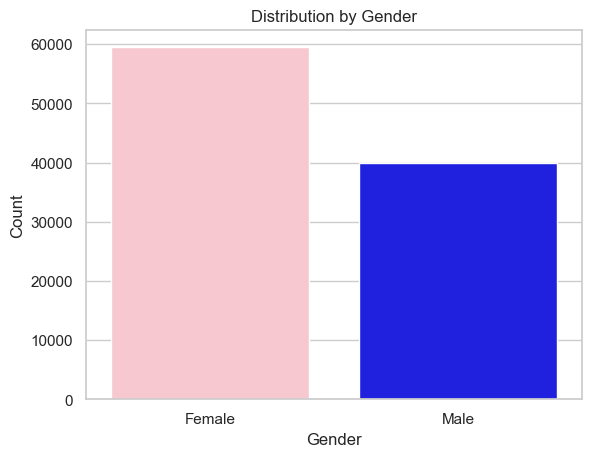

In [18]:
# First, displaying the count of values for gender
print(df.gender.value_counts())

# Now, creating the plot
sns.countplot(data=df, x='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.title('Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

### Itens sold by gender

Here we have the quantity of each item sold to females and males aged between 18 and 40 and then 40 to 69. 
The quantity is noticeably higher for female. 
It shows that female and male after the age of 40 also shop more frequently.

In [19]:
pd.crosstab(df.gender,df.category,values=((df['age'] <= 18) & (df['age'] < 40)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,66,386,165,155,101,56,52,98
Male,40,260,102,126,70,52,37,78


In [20]:
pd.crosstab(df.gender,df.category,values=((df['age'] >=40 ) & (df['age'] <=69)),aggfunc='sum')

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,1679,11822,5257,5089,3469,1734,1688,3495
Male,1201,7992,3474,3357,2319,1128,1161,2262


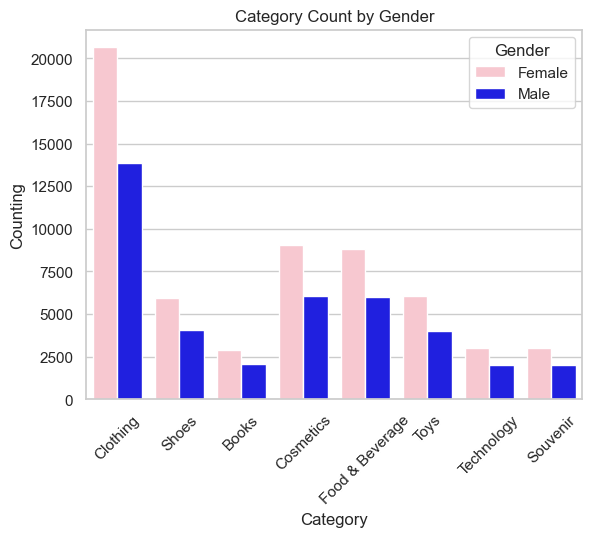

In [21]:
#Plothing graph
sns.countplot(data=df, x='category', hue='gender', palette={'Female': 'pink', 'Male': 'blue'})
plt.xticks(rotation=45)  
plt.title('Category Count by Gender')
plt.xlabel('Category')
plt.ylabel('Counting')
plt.legend(title='Gender')
plt.show()


In [22]:
 # Calculate total sales
df['total_sales'] = df['quantity'] * df['price']  
grouped_data = df.groupby(['gender', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

# Extracting the top three items sold to female customers
top_items_female = grouped_data[(grouped_data['gender'] == 'Female')].nlargest(3, 'total_quantity')

print(top_items_female)

   gender         category  total_quantity  total_sales
1  Female         Clothing           62039  68251695.60
2  Female        Cosmetics           27261   4066772.54
3  Female  Food & Beverage           26362    505322.60


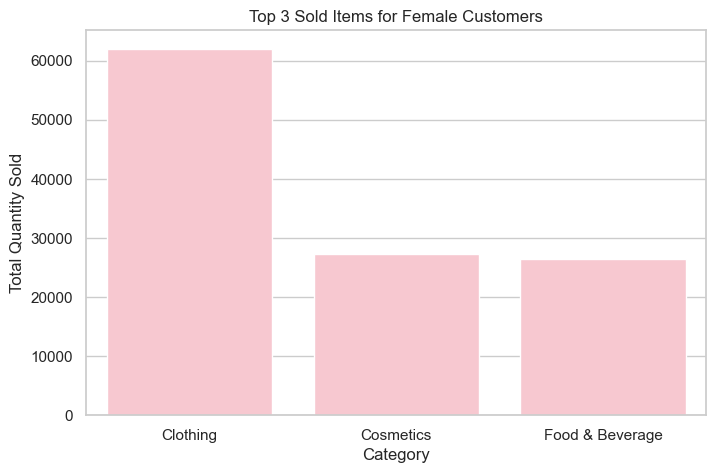

In [23]:
# Plotting the top 3 items for female customers
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items_female, x='category', y='total_quantity', color='pink')
plt.title('Top 3 Sold Items for Female Customers')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

In [24]:
 # Calculate total sales
df['total_sales'] = df['quantity'] * df['price'] 
grouped_data = df.groupby(['gender', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

# Extracting the top three items sold to male customers
top_items_male = grouped_data[(grouped_data['gender'] == 'Male')].nlargest(3, 'total_quantity')

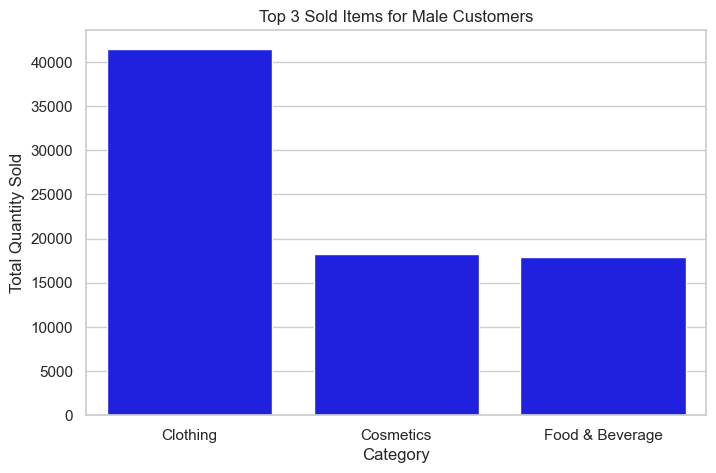

In [25]:
# Plotting the top 3 items for male customers
plt.figure(figsize=(8, 5))
sns.barplot(data=top_items_male, x='category', y='total_quantity', color='blue')
plt.title('Top 3 Sold Items for Male Customers')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

When analysing the data on the top 3 items bought by the different genres. We observed that both have a preference for the same items. However, the male gender has less preference when compared to the female gender. 
Which are represented in the graph above.

## Itens sold by age

In [26]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Create a new column in the DataFrame with the age range labels
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Use pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])
cross_tab

AgeRange,0-20,21-30,31-40,41-50,51-60,61+
category,,,,,,
Books,289,964,946,952,966,864
Clothing,1974,6752,6627,6662,6548,5924
Cosmetics,825,2894,2950,2881,2934,2613
Food & Beverage,863,2824,2931,2812,2796,2550
Shoes,575,1954,1907,1944,1902,1752
Souvenir,277,974,992,930,975,851
Technology,252,991,1006,965,932,850
Toys,569,2047,1907,1920,1879,1765


In [27]:
df['total_sales'] = df['quantity'] * df['price']  # Calculate total sales

# Defining new age ranges
bins = [0, 21, 31, 41, 51, 61, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Grouping data by age range and category
grouped_by_age_category = df.groupby(['age_group', 'category']).agg(
    total_quantity=('quantity', 'sum'),
    total_sales=('total_sales', 'sum')
).reset_index()

Below shows the best-selling categories by age. In the book category there is a similarity of purchase across all ages, but the highest sales are between the ages of 32-40 and 51-60. In the Clothing and Cosmetics category, the age groups are 21-30 and 31-40, which shows a great interest in fashion and beauty products among young adults and middle-aged adults. The technology category peaks in the 41-50 age group, indicating a greater interest among this demographic, potentially for personal and professional use. In the children's toys category, it's actually more popular with younger people. The 61+ age group has a continuing or even necessary interest in food & beverage and technology.

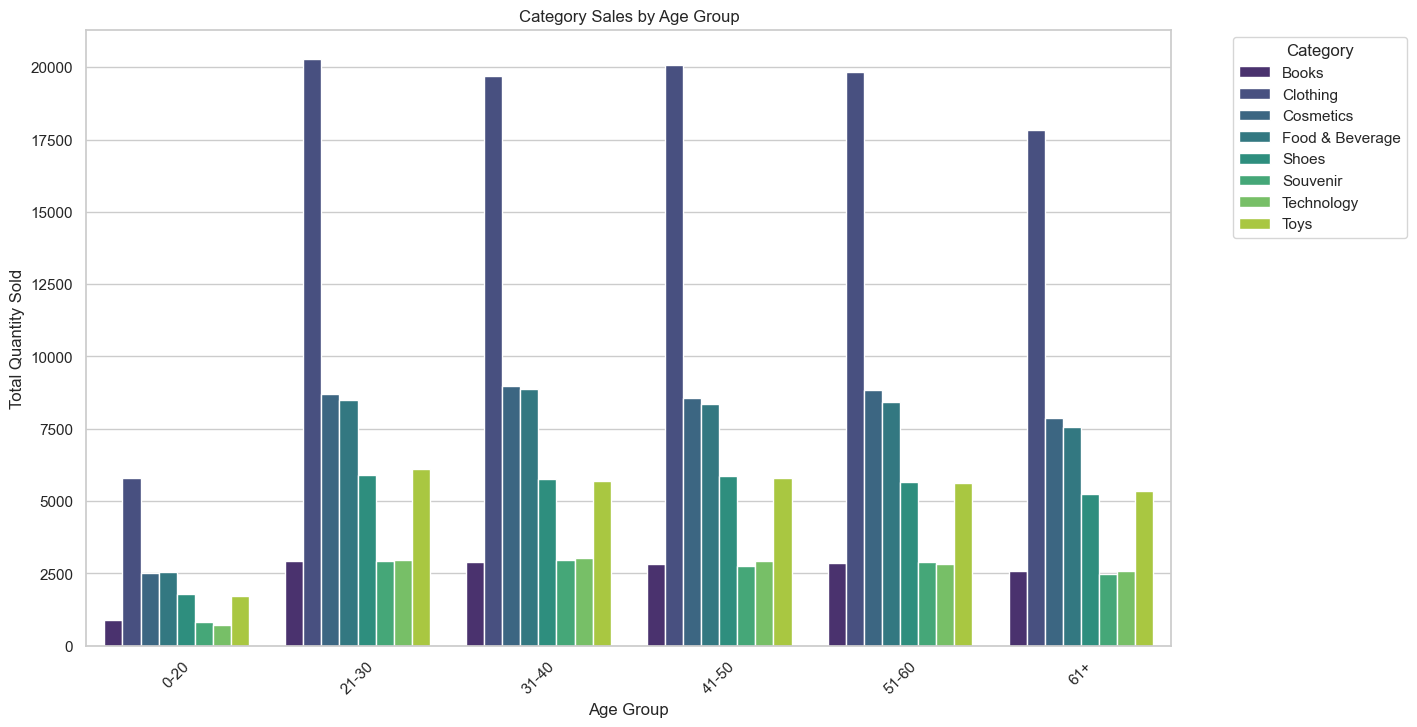

In [28]:
# Plotting items sold by age group and category
plt.figure(figsize=(14, 8))
sns.barplot(data=grouped_by_age_category, x='age_group', y='total_quantity', hue='category', palette='viridis')
plt.title('Category Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  
plt.show()

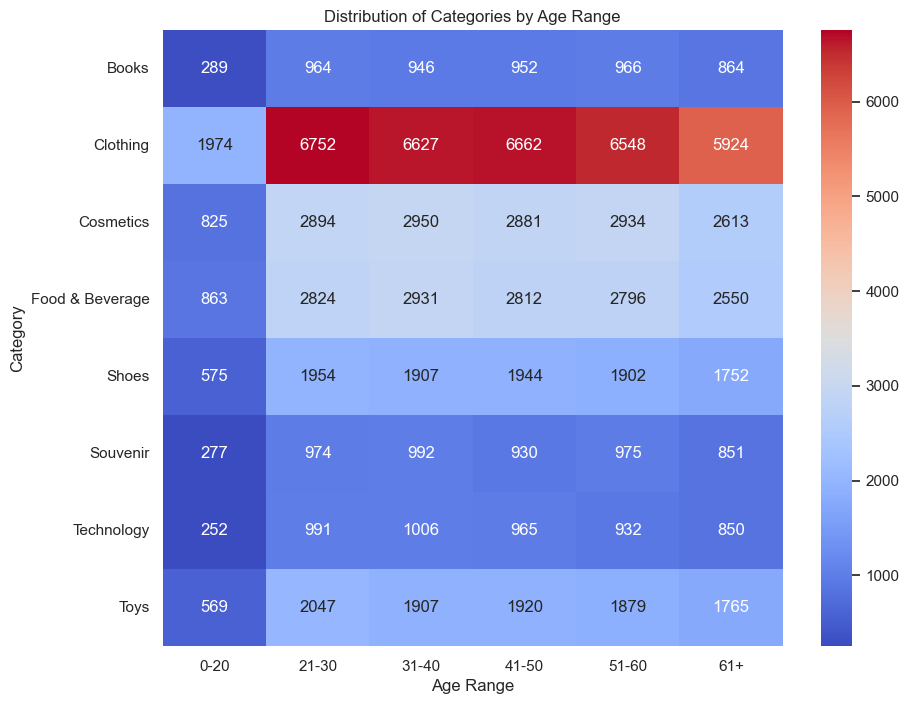

In [29]:
age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeRange'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Using pd.crosstab to count occurrences of age ranges for each category
cross_tab = pd.crosstab(df['category'], df['AgeRange'])

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Distribution of Categories by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Category')
plt.show()

## Itens sold by period

In [30]:
# Convert the 'invoice date' column to datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

# Extract the month and year to a new column
df['month_year'] = df['invoice_date'].dt.to_period('M')

# Calculate total sales per month (quantity * price)
df['total_sale'] = df['quantity'] * df['price']

# Group data by month and year, and add total sales
monthly_sales = df.groupby('month_year')['total_sale'].sum().reset_index()

# Display results
monthly_sales

,month_year,total_sale
0,2021-01,9641614.62
1,2021-02,8772315.22
2,2021-03,9455359.38
3,2021-04,9389541.54
4,2021-05,9771756.97
5,2021-06,9286271.35
6,2021-07,10311119.68
7,2021-08,9630655.70
8,2021-09,9188165.62
9,2021-10,10263015.06


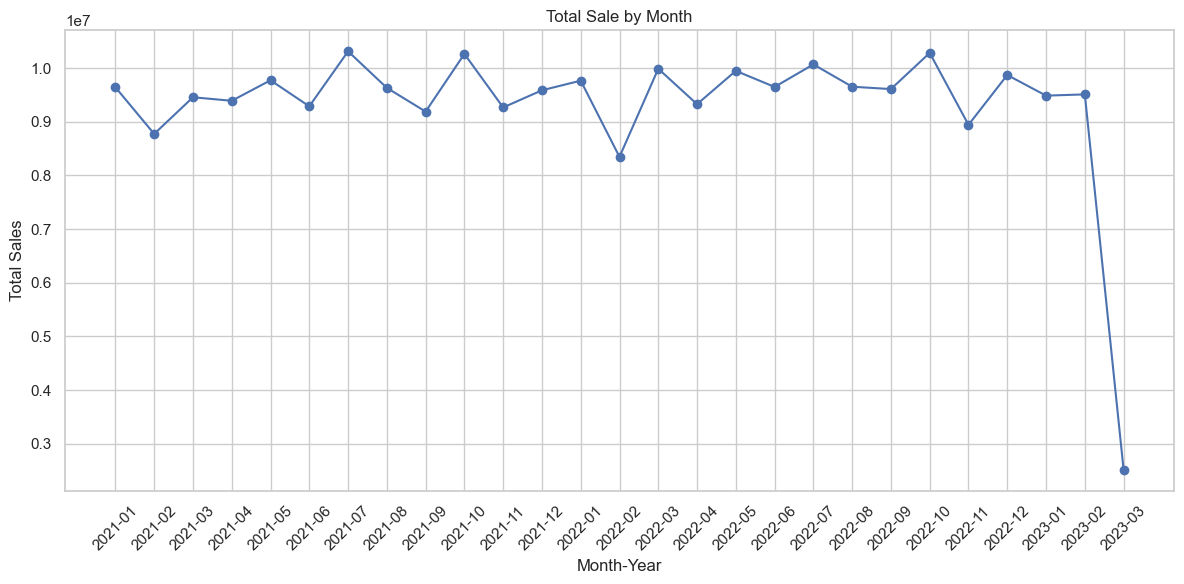

In [31]:
# Plotar os resultados
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], marker='o', linestyle='-')
plt.title('Total Sale by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

There is fluctuation in sales over the months with peaks that may indicate higher sales during specific months, which may be related to seasonal effects, promotional campaigns or market dynamics.
There is a noticeable drop in sales in the last month shown (March 2023), which may indicate a drop in sales or perhaps incomplete data for that month.


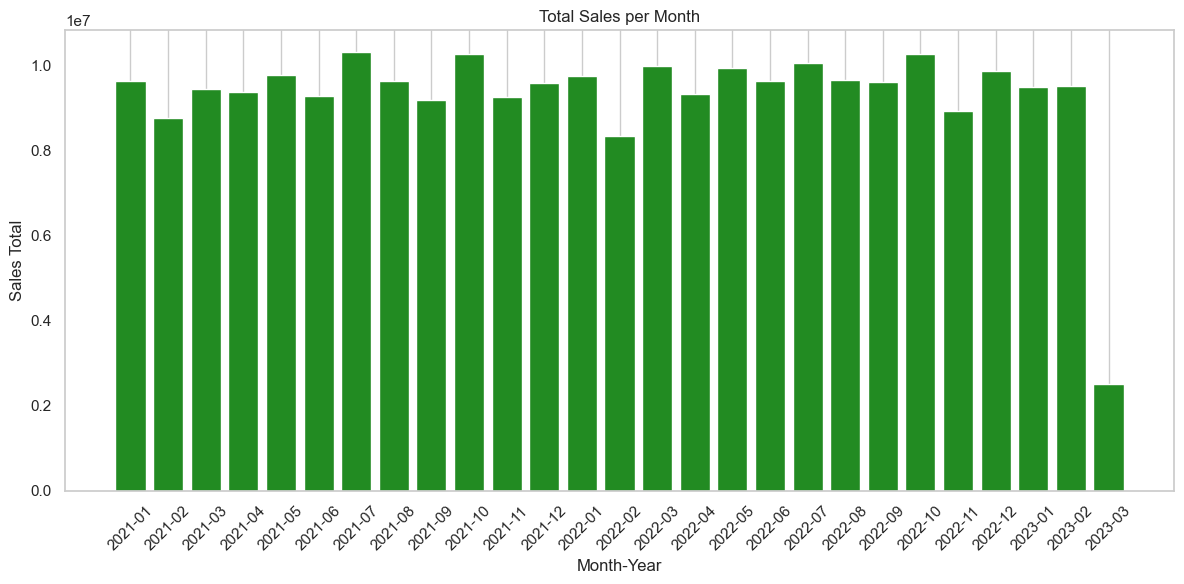

In [32]:
# Configurações do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['month_year'].astype(str), monthly_sales['total_sale'], color='forestgreen')
plt.title('Total Sales per Month')
plt.xlabel('Month-Year')
plt.ylabel('Sales Total')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [33]:
# Extracting quarter from the invoice date
df['quarter'] = df['invoice_date'].dt.to_period('Q')

# Group the data by quarter, summing up the 'quantity'
quarterly_sales = df.groupby('quarter').agg(total_quantity=('quantity', 'sum')).reset_index()


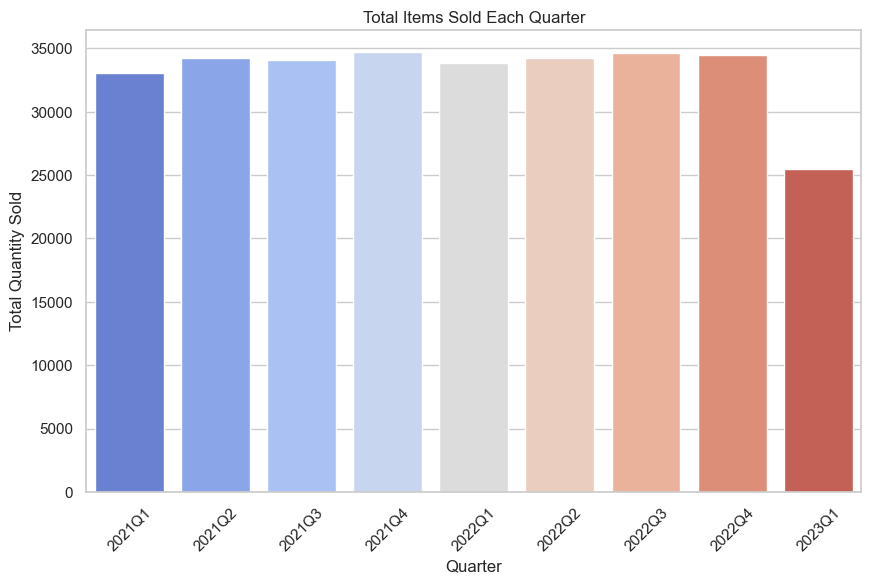

In [34]:
# Plotting the data using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=quarterly_sales, x='quarter', y='total_quantity', palette='coolwarm')
plt.title('Total Items Sold Each Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)  # Rotates the labels on the x-axis for better visibility
plt.show()

### Payments methods

Most of the payment methods chosen by customers are cash, followed by credit cards, and finally debit cards.

In [35]:
payment_methoud=df.payment_method.value_counts()
payment_methoud

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

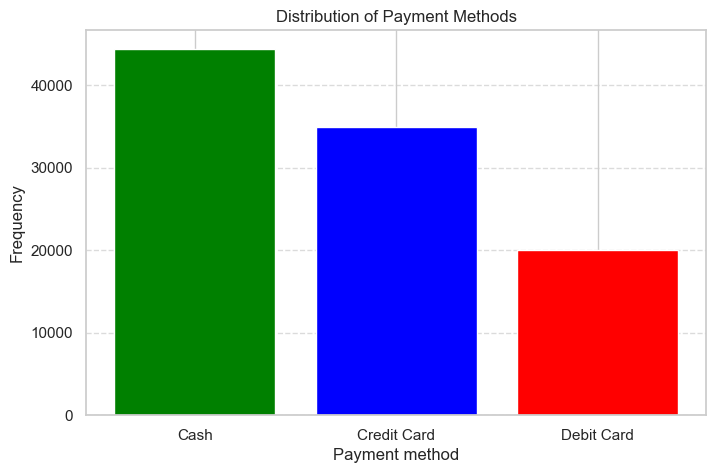

In [36]:
# Payment method data
payment_methods = ['Cash', 'Credit Card', 'Debit Card']
counts = [44447, 34931, 20079]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(payment_methods, counts, color=['green', 'blue', 'red'])
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment method')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the graph
plt.show()

Below shows the breakdown of how different age groups prefer payment methods: cash, credit card and debit card. The categories are divided into age groups: 0-20, 21-30, 31-40, 41-50, 51-60 and 61+. These groups help to analyse the preference for payment methods at different stages of life. In all age groups, the highest frequency of payment is by cash, followed by credit card and debit card. The 0-20 age group shows a much lower frequency than the others. This is due to the fact that only 18-20 year olds are actually assessed, which means a better group than the others, which may explain the lower number of payment types.




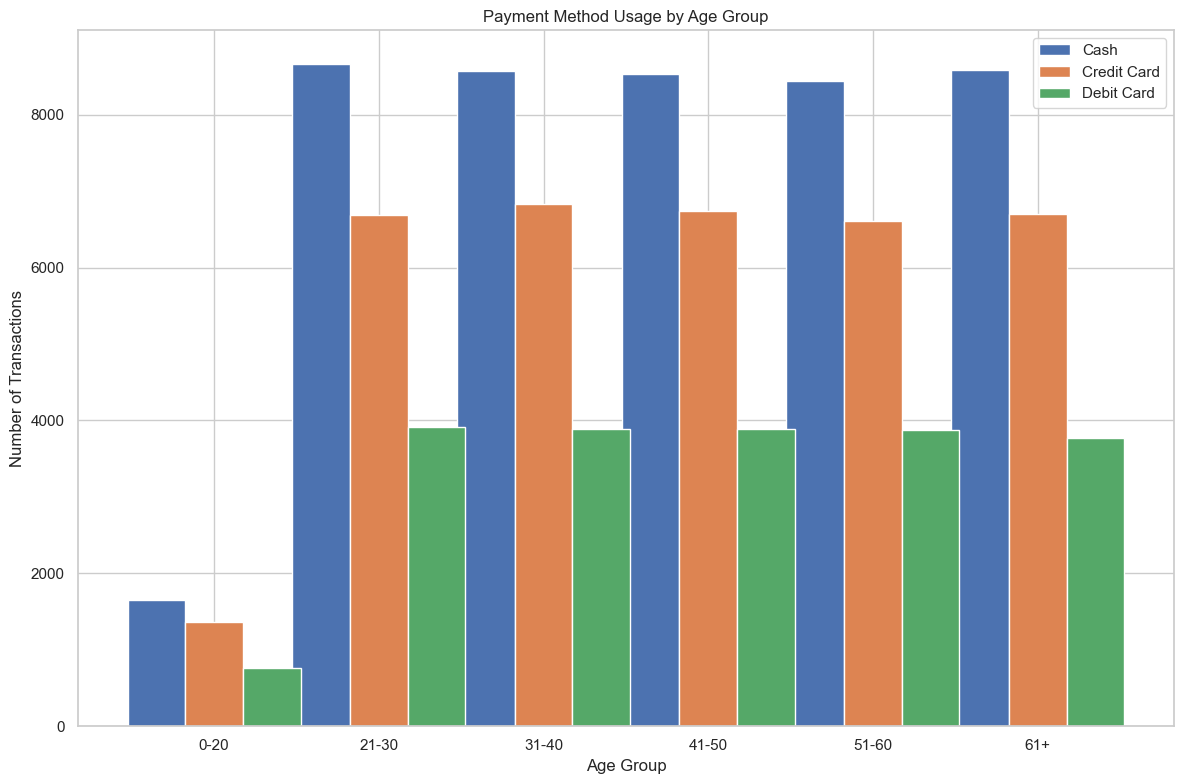

In [37]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and 'payment_method', then count the occurrences
age_payment_grouped = df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')

# Pivot this data to have age groups as indices, payment methods as columns, and counts as values
pivot_table = age_payment_grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
age_groups = pivot_table.index
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Dynamically create bars for each payment method
for i, payment_method in enumerate(pivot_table.columns):
    ax.bar(x + i * width, pivot_table[payment_method], width, label=payment_method)

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Payment Method Usage by Age Group')
ax.set_xticks(x + width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(age_groups)
ax.legend()

# Improve layout
fig.tight_layout()

# Show the plot
plt.show()

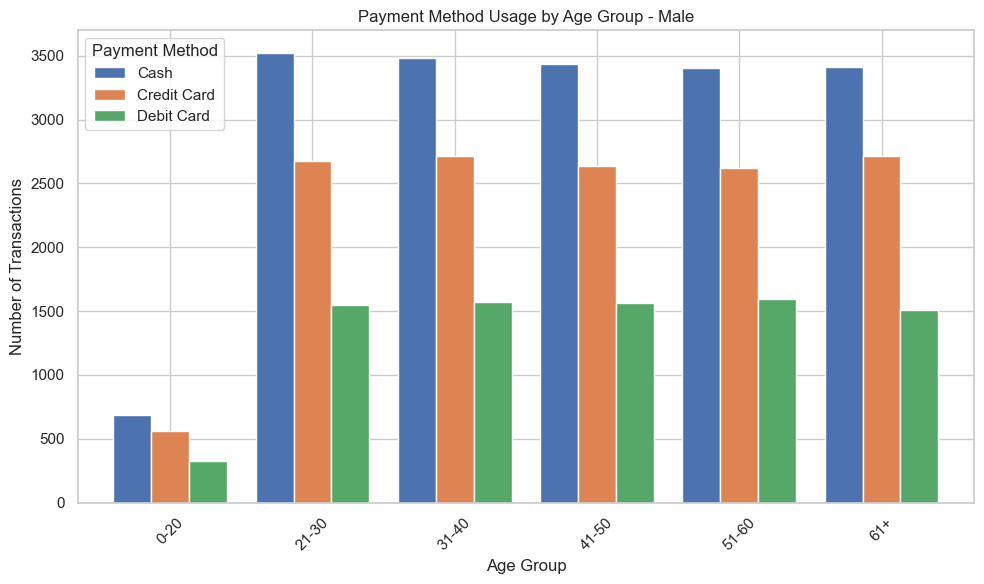

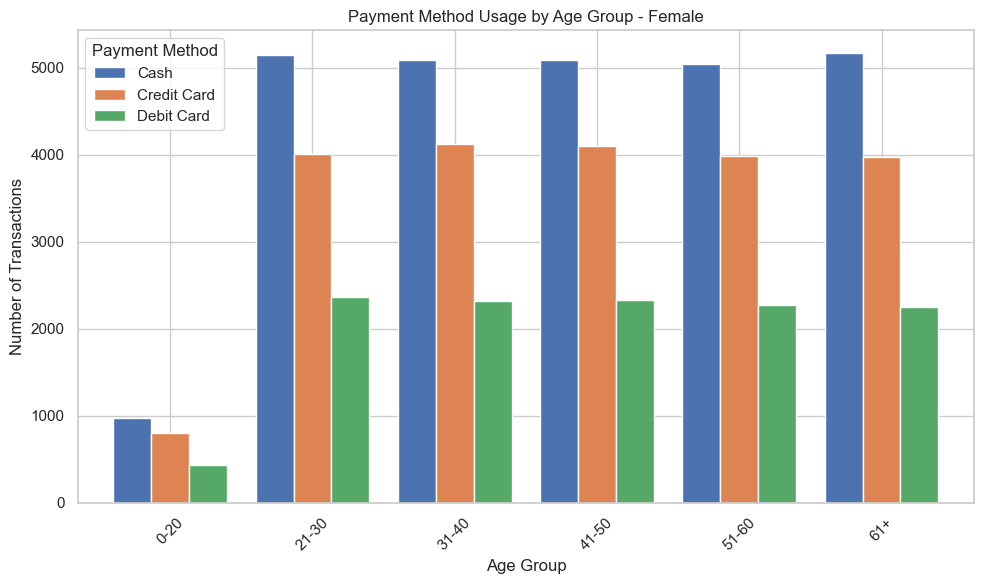

In [38]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Focus on payment methods of interest
payment_methods = ['Credit Card', 'Cash', 'Debit Card']

# Filter data for the specified payment methods
df = df[df['payment_method'].isin(payment_methods)]

# Create separate dataframes for each gender
male_df = df[df['gender'] == 'Male']
female_df = df[df['gender'] == 'Female']

# Function to plot payment method by age group for a given gender data
def plot_payment_distribution(gender_df, gender):
    # Group by 'age_group' and 'payment_method', then count the occurrences
    grouped = gender_df.groupby(['age_group', 'payment_method']).size().reset_index(name='count')
    pivot = grouped.pivot(index='age_group', columns='payment_method', values='count').fillna(0)
    
    # Plotting
    pivot.plot(kind='bar', figsize=(10, 6), width=0.8)
    plt.title(f'Payment Method Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.legend(title='Payment Method')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_payment_distribution(male_df, 'Male')
plot_payment_distribution(female_df, 'Female')

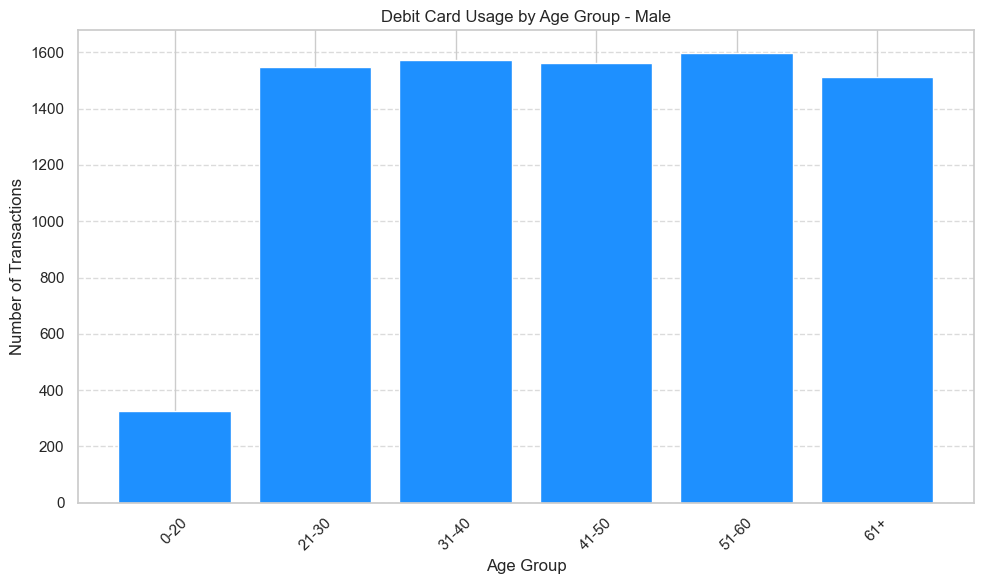

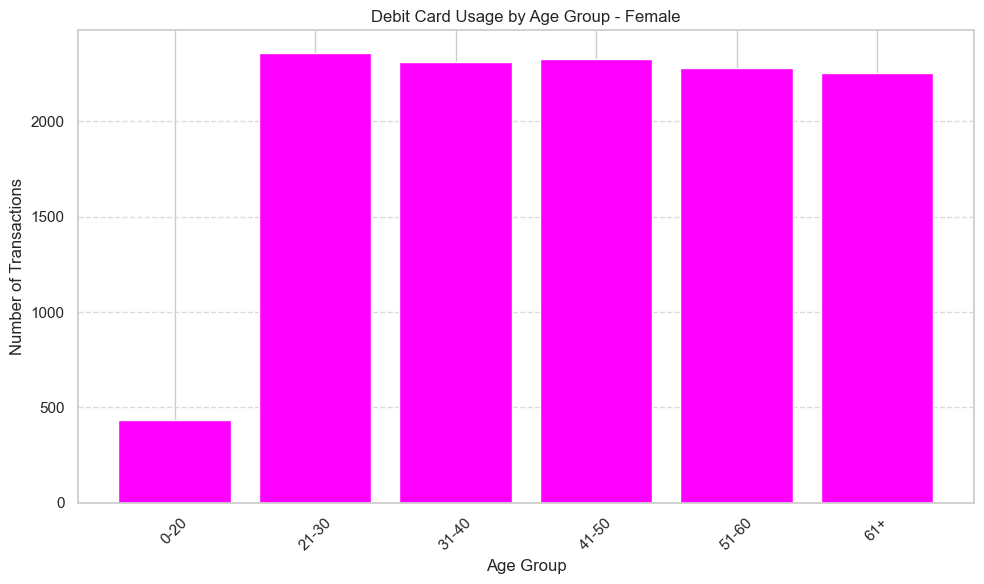

In [39]:
# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Create separate dataframes for each gender
male_df = debit_card_df[debit_card_df['gender'] == 'Male']
female_df = debit_card_df[debit_card_df['gender'] == 'Female']

# Function to plot debit card usage by age group for a given gender
def plot_debit_card_usage(gender_data, gender):
    # Group by 'age_group' and count the occurrences
    grouped = gender_data.groupby(['age_group']).size().reset_index(name='count')
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(grouped['age_group'], grouped['count'], color='dodgerblue' if gender == 'Male' else 'magenta')
    plt.title(f'Debit Card Usage by Age Group - {gender}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for each gender
plot_debit_card_usage(male_df, 'Male')
plot_debit_card_usage(female_df, 'Female')

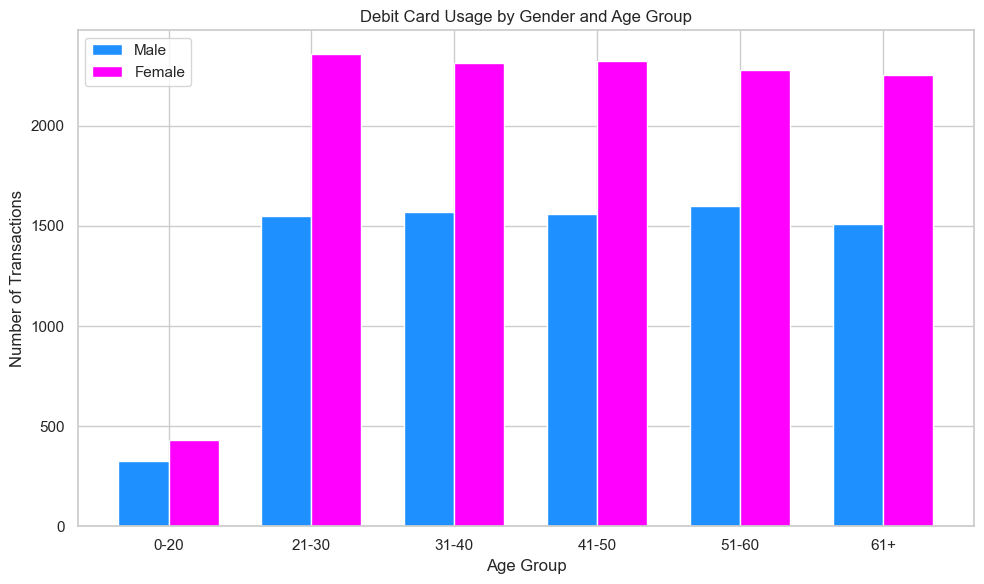

In [40]:

# Filter data to only include debit card transactions
debit_card_df = df[df['payment_method'] == 'Debit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = debit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Debit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

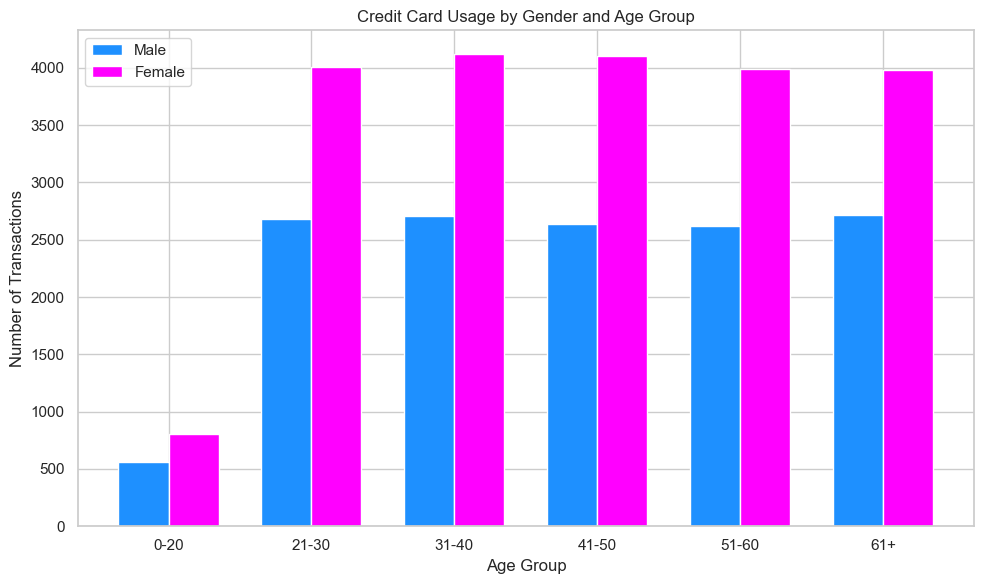

In [41]:

# Define age bins and labels for the categorization
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']

# Categorize the ages into bins
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Filter data to only include credit card transactions
credit_card_df = df[df['payment_method'] == 'Credit Card']

# Group by 'age_group' and 'gender', then count the occurrences
grouped = credit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

# Pivot the data to have age groups as indices and genders as columns
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))

# Creating bars for each gender
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

# Customize the plot
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Credit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
#Defining bins
bins = [0, 20, 30, 40, 50, 60, np.inf]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#Filtereing by Payment method
credit_card_df = df[df['payment_method'] == 'Credit Card']

#Grouping data
grouped = credit_card_df.groupby(['age_group', 'gender']).size().reset_index(name='count')

#Pivoting data
pivot_table = grouped.pivot(index='age_group', columns='gender', values='count').fillna(0)

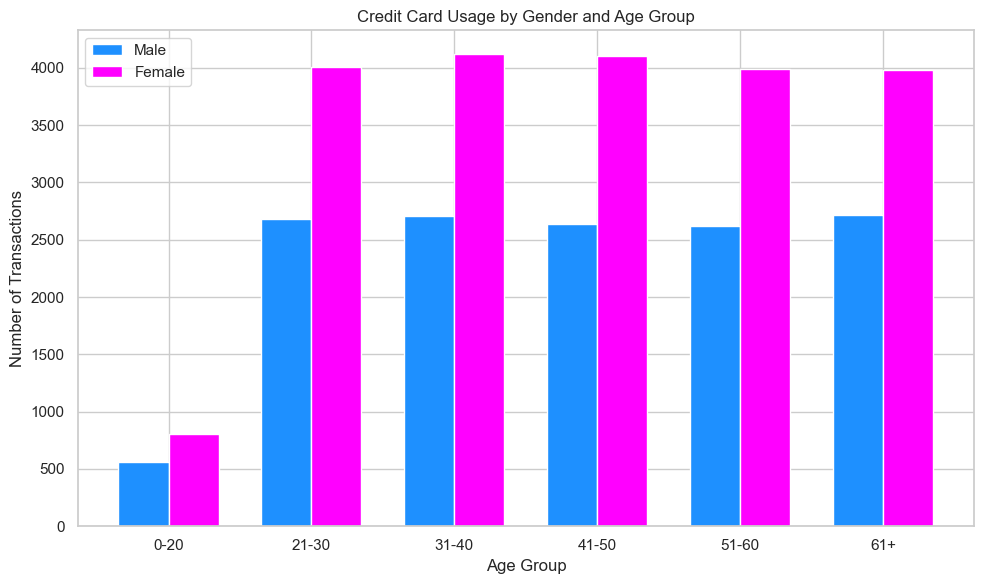

In [43]:
#Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(labels))
bars1 = ax.bar(index, pivot_table['Male'], bar_width, label='Male', color='dodgerblue')
bars2 = ax.bar(index + bar_width, pivot_table['Female'], bar_width, label='Female', color='magenta')

ax.set_xlabel('Age Group')
ax.set_ylabel('Number of Transactions')
ax.set_title('Credit Card Usage by Gender and Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

The percentage of sales to women is 19.6% higher than to men.

In [44]:
# Count the number of transactions for each gender
gender_counts = df['gender'].value_counts()

# Calculate the percentage difference
if 'Male' in gender_counts and 'Female' in gender_counts:
    total_purchases = gender_counts.sum()
    male_percentage = (gender_counts['Male'] / total_purchases) * 100
    female_percentage = (gender_counts['Female'] / total_purchases) * 100
    difference_percentage = abs(male_percentage - female_percentage)
    print(f"Male Purchase Percentage: {male_percentage:.2f}%")
    print(f"Female Purchase Percentage: {female_percentage:.2f}%")
    print(f"Percentage Difference in Purchases Between Genders: {difference_percentage:.2f}%")
else:
    print("Gender data may be missing or incorrect.")

Male Purchase Percentage: 40.19%
Female Purchase Percentage: 59.81%
Percentage Difference in Purchases Between Genders: 19.61%


### Sales by shopping mall

In [45]:
# Calculate total sales per item (quantity * price)
df['total_sale'] = df['quantity'] * df['price']

# Group data by shopping mall and add total sales
mall_sales = df.groupby('shopping_mall')['total_sale'].sum().reset_index()

# Sort the results to see the mall with the highest sales volume
mall_sales_sorted = mall_sales.sort_values(by='total_sale', ascending=False)

# Display results
mall_sales_sorted

,shopping_mall,total_sale
5,Mall of Istanbul,50872481.68
4,Kanyon,50554231.10
6,Metrocity,37302787.33
7,Metropol AVM,25379913.19
3,Istinye Park,24618827.68
9,Zorlu Center,12901053.82
0,Cevahir AVM,12645138.20
8,Viaport Outlet,12521339.72
1,Emaar Square Mall,12406100.29
2,Forum Istanbul,12303921.24


Mall of Istanbul" is the shopping mall with the highest sales volume, closely followed by "Kanyon".

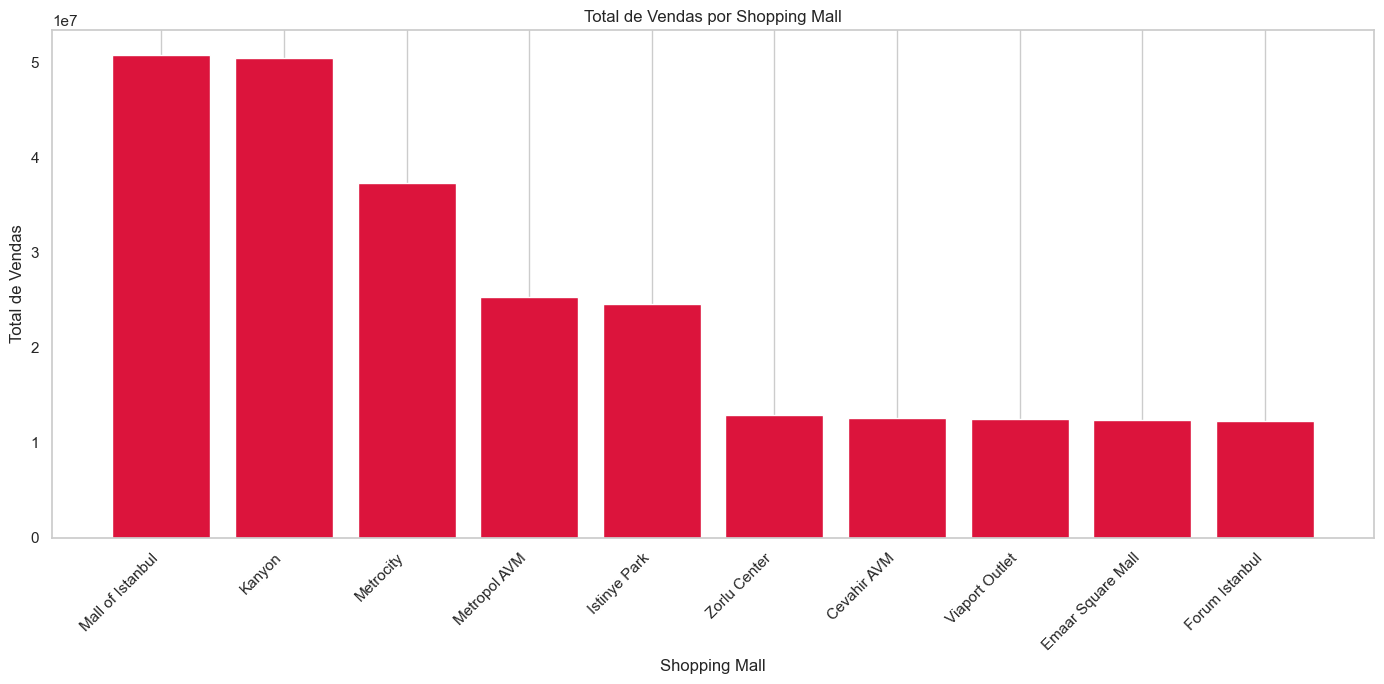

In [46]:
# Bar chart settings for sales by shopping mall
plt.figure(figsize=(14, 7))
plt.bar(mall_sales_sorted['shopping_mall'], mall_sales_sorted['total_sale'], color='crimson')
plt.title('Total de Vendas por Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()

# Mostrar o gráfico
plt.show()

In [47]:
# Calculate total sales per item (quantity * price)
df['total_sale'] = df['quantity'] * df['price']

# Create age ranges using pd.cut to categorize ages
bins = [0, 18, 25, 35, 45, 55, 65, 100]  
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group data by shopping mall and age group, and add total sales
sales_by_age_mall = df.groupby(['shopping_mall', 'age_group'])['total_sale'].sum().unstack(fill_value=0)

# Display results
sales_by_age_mall

age_group,0-18,19-25,26-35,36-45,46-55,56-65,66-100
shopping_mall,,,,,,,
Cevahir AVM,0.0,1664351.53,2522439.02,2428486.81,2482859.54,2372138.64,1174862.66
Emaar Square Mall,0.0,1726248.08,2232306.95,2733462.67,2176061.05,2437226.57,1100794.97
Forum Istanbul,0.0,1559004.11,2474532.28,2348478.85,2358697.96,2185508.65,1377699.39
Istinye Park,0.0,3095104.71,4522268.61,4887413.37,5049685.87,4491194.27,2573160.85
Kanyon,0.0,6968564.00,9099764.49,10406256.83,9673112.69,9636923.87,4769609.22
Mall of Istanbul,0.0,6861248.79,9521269.27,10136170.90,9539940.89,10166281.49,4647570.34
Metrocity,0.0,4847601.30,7526255.90,7053751.36,7290294.95,7023341.25,3561542.57
Metropol AVM,0.0,3336741.10,5077895.34,5122245.71,4815972.56,4528360.25,2498698.23
Viaport Outlet,0.0,1766856.75,2421931.45,2376057.86,2360805.06,2477077.10,1118611.50


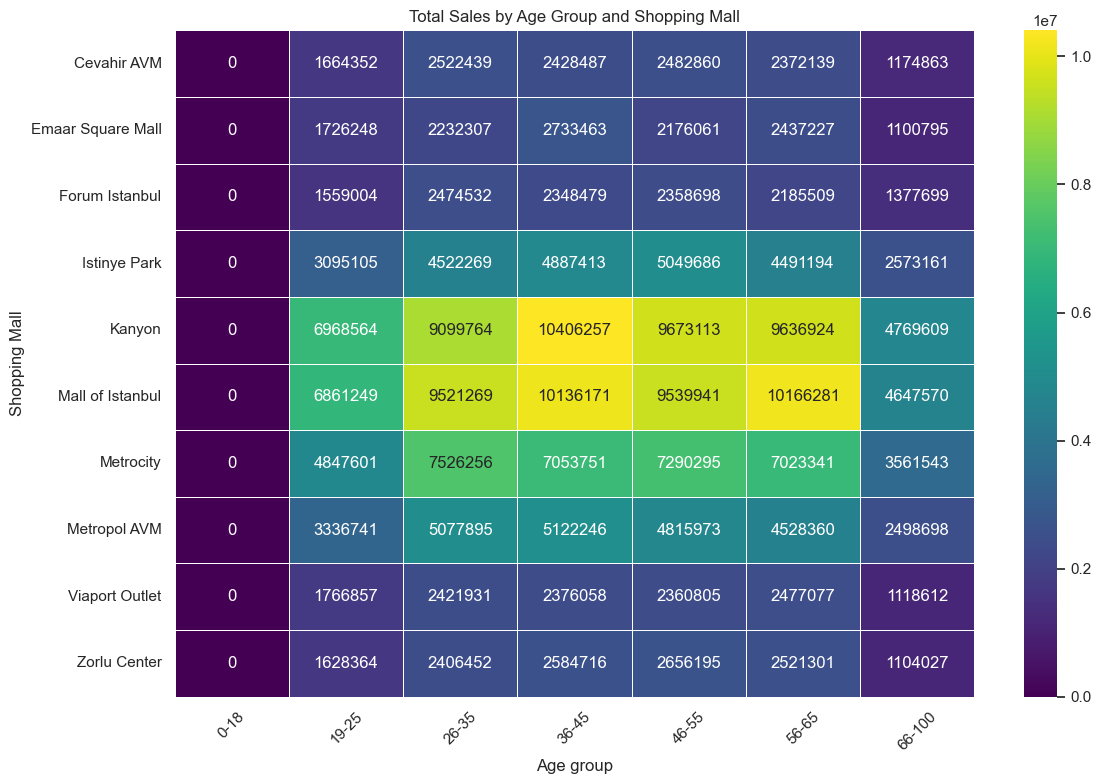

In [48]:
# Configure the heatmap graph
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_age_mall, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
plt.title('Total Sales by Age Group and Shopping Mall')
plt.xlabel('Age group')
plt.ylabel('Shopping Mall')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Plot graph
plt.show()

A illustrates the distribution of total sales across various shopping malls for distinct age groups. Each graph represents a specific age demographic and shows the total sales in each shopping mall within that age group. The preferences among the age groups are very similar, as all the shopping malls with the most purchases are Mall of Istanbul, Kanyon and Metrocity. What may influence the purchases of the different age groups is that they prefer shopping centres with more accessible facilities or those located in residential areas.

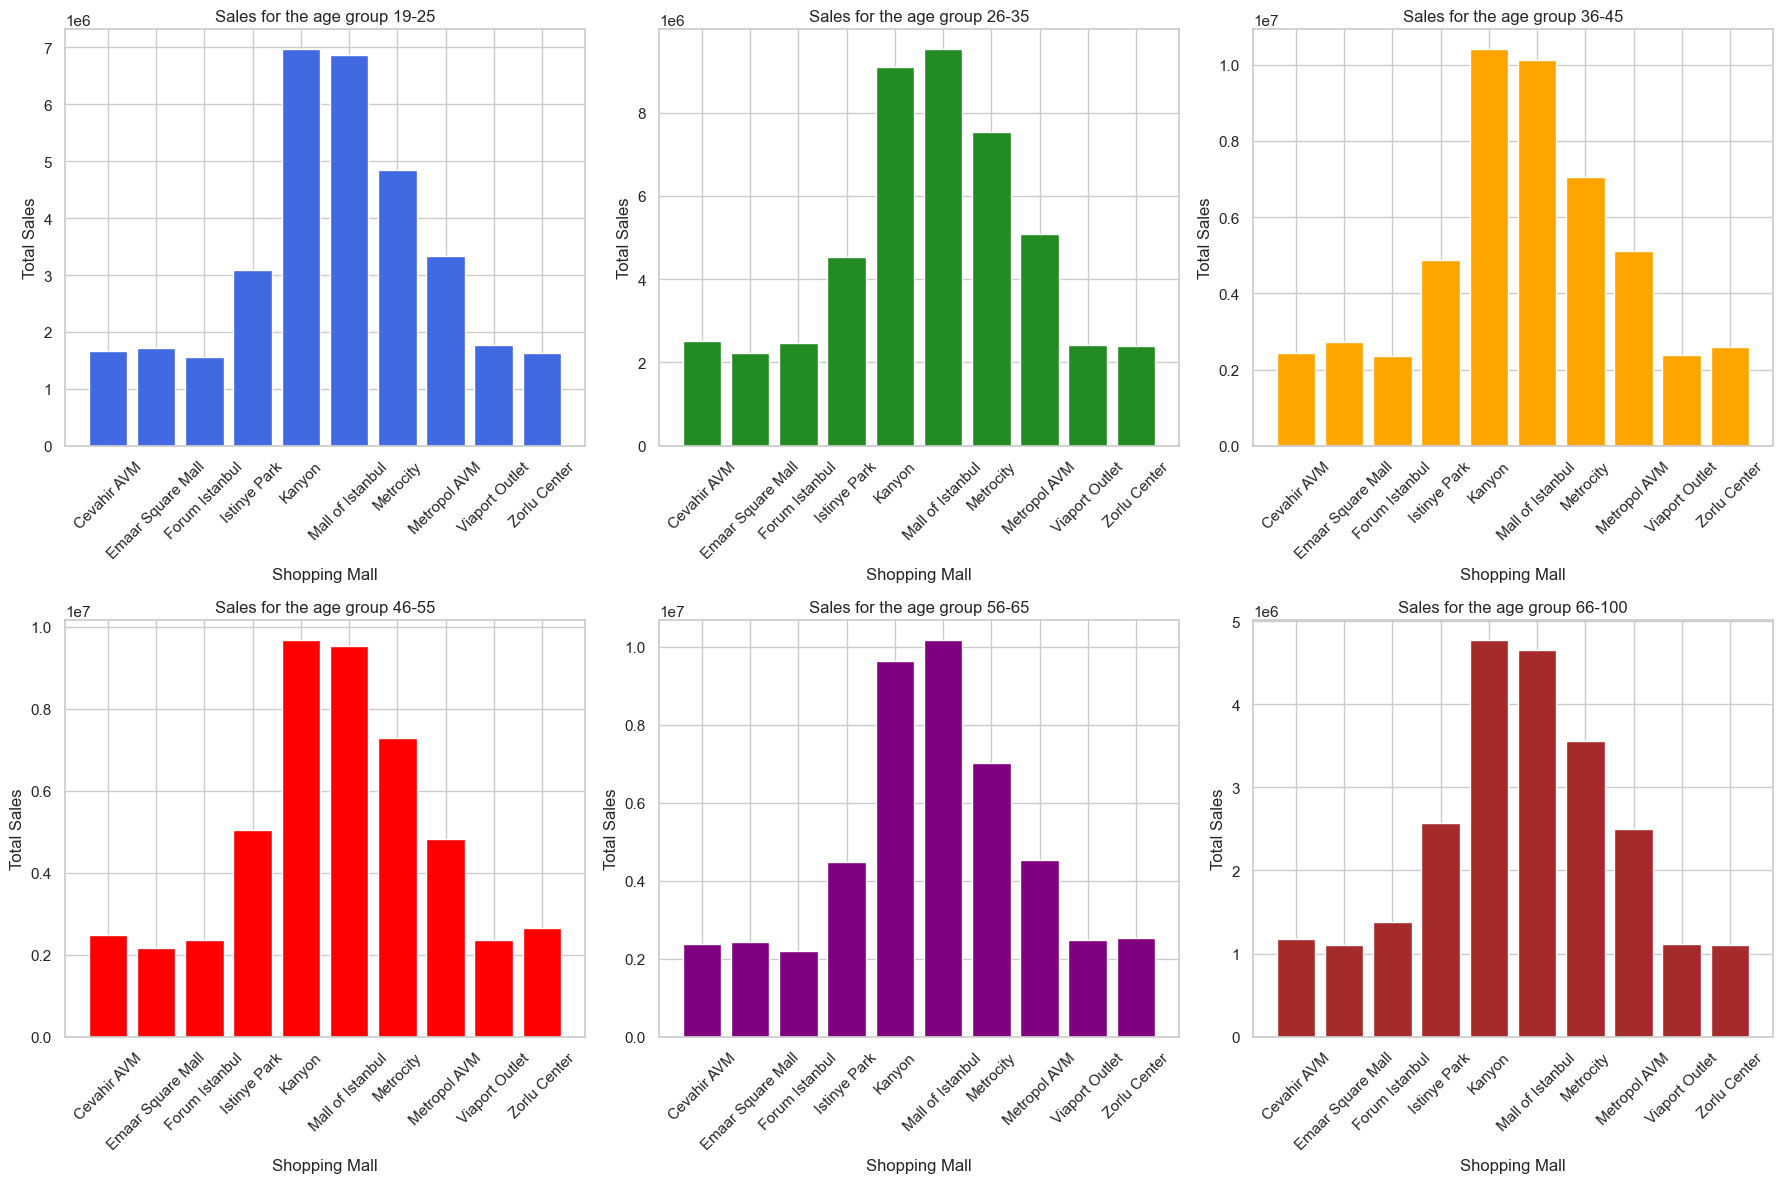

In [49]:
# Lista das faixas etárias e suas respectivas cores
age_groups = ['19-25', '26-35', '36-45', '46-55', '56-65', '66-100']
colors = ['royalblue', 'forestgreen', 'orange', 'red', 'purple', 'brown']

# Definir quantas linhas e colunas de gráficos você deseja
n_rows = 2  # Número de linhas
n_cols = 3  # Número de colunas

# Criar uma figura com múltiplos subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12))  # Ajuste o tamanho conforme necessário

# Iterar sobre os grupos de idade e criar um gráfico para cada um
for index, (age_group, ax) in enumerate(zip(age_groups, axes.flatten())):
    ax.bar(sales_by_age_mall.index, sales_by_age_mall[age_group], color=colors[index])
    ax.set_title(f'Sales for the age group {age_group}')
    ax.set_xlabel('Shopping Mall')
    ax.set_ylabel('Total Sales')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

## Most sold item based on Quantity

In [50]:
# Create a new pivot table that adds the quantity ordered for each category in each shopping mall
most_sold_items_per_mall = df.pivot_table(index=['shopping_mall', 'category'], values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False)

# Showing the best selling items by shopping mall
most_sold_items_per_mall

,,quantity
shopping_mall,category,
Mall of Istanbul,Clothing,20813
Kanyon,Clothing,20513
Metrocity,Clothing,15729
Metropol AVM,Clothing,10552
Istinye Park,Clothing,10165
...,...,...
Viaport Outlet,Books,720
Zorlu Center,Souvenir,716
Cevahir AVM,Souvenir,708


C:\Users\karik\AppData\Local\Temp\ipykernel_17904\1471158722.py:9: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)


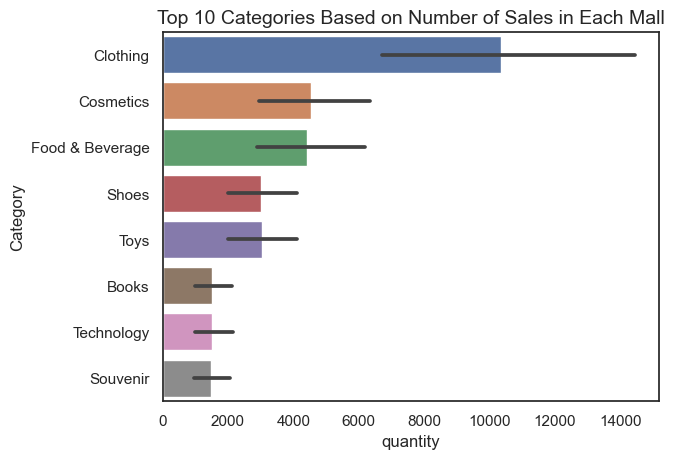

In [51]:
# Configuring the chart style
most_sold_items_per_mall.reset_index(inplace=True)

# Configurando o estilo do gráfico
sns.set_style('white')

# Creating a bar chart of best-selling categories
# Plotting only the 10 most requested categories in each shopping mall
top_10_items = most_sold_items_per_mall.groupby('shopping_mall').apply(lambda x: x.nlargest(10, 'quantity')).reset_index(drop=True)
sns.barplot(y='category', x='quantity', data=top_10_items)

# Adding a suitable title to the chart
plt.title('Top 10 Categories Based on Number of Sales in Each Mall', fontsize=14)

# Defining the Y axis label
plt.ylabel('Category')

# Plot graph
plt.show()

In [52]:
# Create a pivot table with customers as rows, categories as columns, and sum of quantities as values
user_item_matrix = df.pivot_table(index='customer_id', columns='category', values='quantity', aggfunc='sum', fill_value=0)

# Display the created pivot table
user_item_matrix.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
customer_id,,,,,,,,
C100004,0,5,0,0,0,0,0,0
C100005,0,0,0,0,2,0,0,0
C100006,0,0,0,0,0,0,0,3
C100012,0,0,0,5,0,0,0,0
C100019,0,0,0,0,0,0,0,1


### Most items sold in each shoppoing

In [53]:
# Calculate total sales per item
df['total_sales'] = df['quantity'] * df['price']

# Group data by shopping mall and category and add sales
sales_by_mall_category = df.groupby(['shopping_mall', 'category'])['total_sales'].sum()

# Identify the category with the highest sales for each shopping mall
top_category_by_mall = sales_by_mall_category.groupby(level=0).idxmax()

# Display the best-selling category for each shopping mall
print(top_category_by_mall)

shopping_mall
Cevahir AVM                (Cevahir AVM, Clothing)
Emaar Square Mall    (Emaar Square Mall, Clothing)
Forum Istanbul          (Forum Istanbul, Clothing)
Istinye Park              (Istinye Park, Clothing)
Kanyon                          (Kanyon, Clothing)
Mall of Istanbul      (Mall of Istanbul, Clothing)
Metrocity                    (Metrocity, Clothing)
Metropol AVM              (Metropol AVM, Clothing)
Viaport Outlet          (Viaport Outlet, Clothing)
Zorlu Center              (Zorlu Center, Clothing)
Name: total_sales, dtype: object


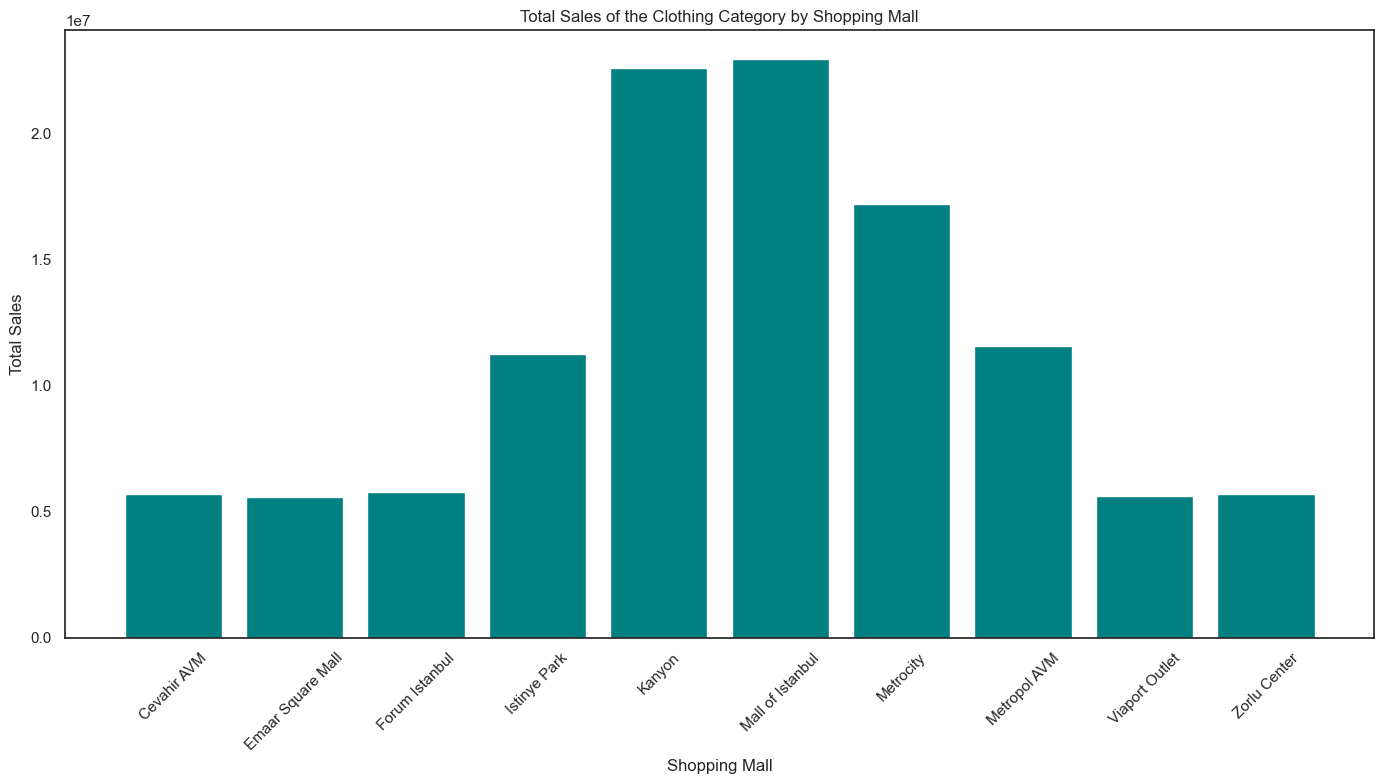

In [54]:
# Calculate total sales per item
df['total_sales'] = df['quantity'] * df['price']

# Group data by shopping mall and category, and add sales
sales_by_mall_category = df.groupby(['shopping_mall', 'category'])['total_sales'].sum()

# Identify the category with the highest sales for each shopping mall
top_category_by_mall = sales_by_mall_category.groupby(level=0).idxmax()

# Calculate total sales for the best-selling category in each shopping mall
total_sales_top_category = sales_by_mall_category.loc[top_category_by_mall]

# Prepare data for chart
malls = total_sales_top_category.index.get_level_values(0)
sales = total_sales_top_category.values

# Plot bar graph
plt.figure(figsize=(14, 8))
plt.bar(malls, sales, color='teal')
plt.title('Total Sales of the Clothing Category by Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ID Costumer

A new costumer ID is generated for each purchase, so it is not possible to evaluate purchases in this way.

customer_id
C137763    26250.0
C699580    26250.0
C110600    26250.0
C110625    26250.0
C211345    26250.0
C139344    26250.0
C700083    26250.0
C291511    26250.0
C291627    26250.0
C164347    26250.0
Name: total_sales, dtype: float64


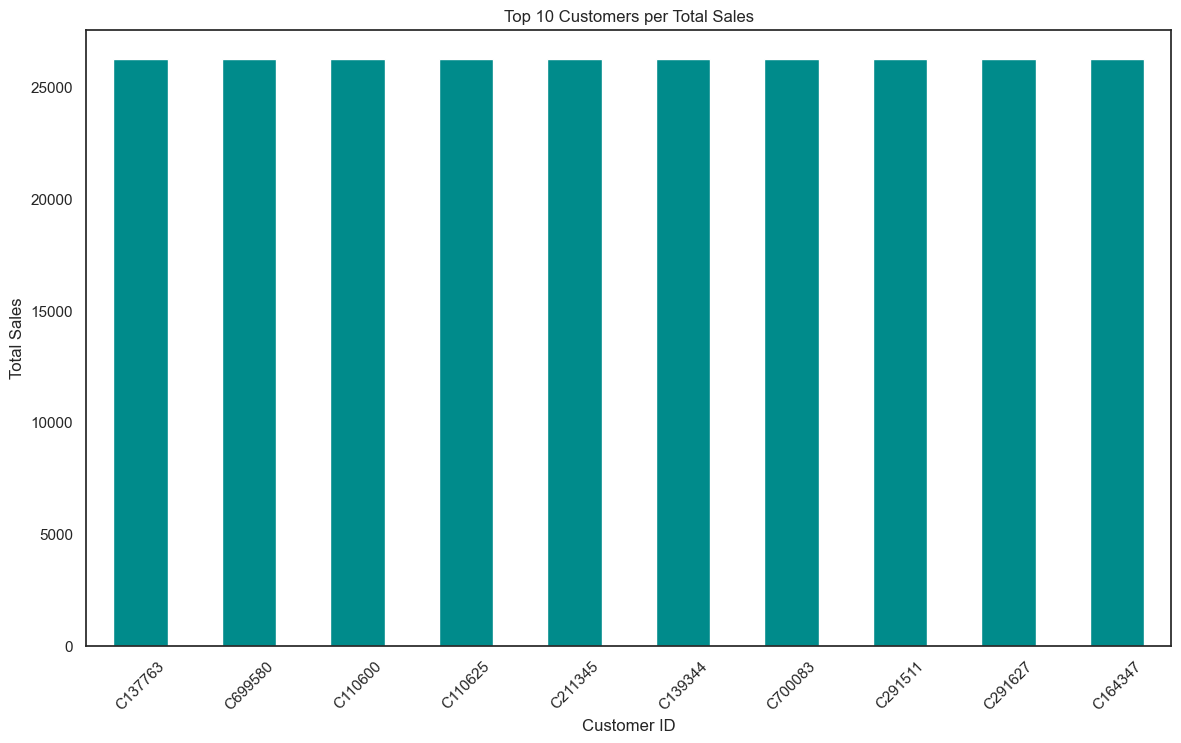

In [55]:
# Group data by customer_id and add sales
total_sales_by_customer = df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False)

# Check the first results to get an idea of the values
print(total_sales_by_customer.head(10))

# Create a bar chart to visualize the top 10 customers with the highest sales
plt.figure(figsize=(14, 8))
total_sales_by_customer.head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Customers per Total Sales')
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Frequently Bought Together

In [56]:
# Transform the dataset for market basket analysis
basket = (df.groupby(['invoice_no', 'category'])['quantity'].sum()
          .unstack().reset_index().fillna(0).set_index('invoice_no'))

In [57]:
# Display the transformed basket dataframe to check the result
basket.head()

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
invoice_no,,,,,,,,
I100008,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
I100014,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0
I100015,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
I100024,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
I100027,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0


In [58]:
#We are getting the quantity ordered (example : 48,24,126) while we just want to know if that particular item is purchased or not
#thus we are encoding units as 1(if purchased) or 0(not purchased)

def encode_units(x):
    if x < 1:
        return 0
    if x >= 1:
        return 1


basket = basket.applymap(encode_units)

In [59]:
# this looks good as everything is ecnoded into 0 and 1
basket.head(10)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
invoice_no,,,,,,,,
I100008,0,1,0,0,0,0,0,0
I100014,0,0,1,0,0,0,0,0
I100015,0,1,0,0,0,0,0,0
I100024,1,0,0,0,0,0,0,0
I100027,0,0,0,0,0,0,1,0
I100028,0,1,0,0,0,0,0,0
I100031,0,0,0,1,0,0,0,0
I100033,0,0,0,1,0,0,0,0
I100037,0,1,0,0,0,0,0,0


# Apriori 

In [60]:
from mlxtend.frequent_patterns import apriori,association_rules
from collections import Counter
from IPython.display import Image

In [61]:
!pip install mlxtend

In [62]:
df.set_index('invoice_no', inplace=True)

# Converter todas as entradas para booleanos
df = df.applymap(lambda x: x > 0 if type(x) == int else False)


In [63]:
# Agora aplicar o algoritmo Apriori
frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Imprimir as regras geradas
print("Número de regras geradas:", len(rules))
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Número de regras geradas: 12
    antecedents   consequents   support  confidence  lift
0         (age)    (quantity)  1.000000    1.000000   1.0
1    (quantity)         (age)  1.000000    1.000000   1.0
2  (gender_int)         (age)  0.401932    1.000000   1.0
3         (age)  (gender_int)  0.401932    0.401932   1.0
4  (gender_int)    (quantity)  0.401932    1.000000   1.0


In [64]:
# Aplicar o algoritmo Apriori para encontrar os itemsets frequentes
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Gerar as regras de associação
df_rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Agora df_rules está definido e contém as regras de associação
print(df_rules.head())

    antecedents   consequents  antecedent support  consequent support  \
0         (age)    (quantity)            1.000000            1.000000   
1    (quantity)         (age)            1.000000            1.000000   
2  (gender_int)         (age)            0.401932            1.000000   
3         (age)  (gender_int)            1.000000            0.401932   
4  (gender_int)    (quantity)            0.401932            1.000000   

    support  confidence  lift  leverage  conviction  zhangs_metric  
0  1.000000    1.000000   1.0       0.0         inf            0.0  
1  1.000000    1.000000   1.0       0.0         inf            0.0  
2  0.401932    1.000000   1.0       0.0         inf            0.0  
3  0.401932    0.401932   1.0       0.0         1.0            0.0  
4  0.401932    1.000000   1.0       0.0         inf            0.0  


### Creating the function

In [65]:
def frequently_bought_together(item_name):
    item_set = frozenset([item_name])
    relevant_rules = rules[(rules['antecedents'] == item_set) | (rules['consequents'] == item_set)]
    items_together = set()
    for idx, row in relevant_rules.iterrows():
        combined_items = row['antecedents'] | row['consequents']
        combined_items.remove(item_set)
        items_together.update(combined_items)
    return list(items_together)

In [66]:
def generate_association_rules(df, min_support=0.01, min_confidence=0.1):
    """
    Generates association rules from a given DataFrame using the Apriori algorithm.

    Parameters:
        df (pd.DataFrame): DataFrame where each column is an item and each row represents whether the item was purchased (True/False).
        min_support (float): The minimum support of the itemsets returned. Default is 0.01.
        min_confidence (float): Minimum confidence for the rules returned. Default is 0.1.

    Returns:
        pd.DataFrame: DataFrame containing the association rules including metrics like support, confidence, and lift.
    """
    # Check if the DataFrame contains only boolean or binary values
    if not df.isin([0, 1, True, False]).all().all():
        raise ValueError("DataFrame should only contain boolean or binary values.")
    
    # Applying the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    
    # Generating association rules
    rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=min_confidence)
    
    return rules

# Usage example (assuming df is your pre-processed DataFrame):
# rules = generate_association_rules(df)
# print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

In [67]:
rules = generate_association_rules(df, min_support=0.005, min_confidence=0.2)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

               antecedents             consequents   support  confidence  lift
0                    (age)              (quantity)  1.000000    1.000000   1.0
1               (quantity)                   (age)  1.000000    1.000000   1.0
2             (gender_int)                   (age)  0.401932    1.000000   1.0
3                    (age)            (gender_int)  0.401932    0.401932   1.0
4             (gender_int)              (quantity)  0.401932    1.000000   1.0
5               (quantity)            (gender_int)  0.401932    0.401932   1.0
6   (gender_int, quantity)                   (age)  0.401932    1.000000   1.0
7        (gender_int, age)              (quantity)  0.401932    1.000000   1.0
8          (age, quantity)            (gender_int)  0.401932    0.401932   1.0
9             (gender_int)         (age, quantity)  0.401932    1.000000   1.0
10              (quantity)       (gender_int, age)  0.401932    0.401932   1.0
11                   (age)  (gender_int, quantity)  

In [68]:
# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)

# Display some rules for validation
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

              antecedents consequents   support  confidence  lift
0                   (age)  (quantity)  1.000000         1.0   1.0
1              (quantity)       (age)  1.000000         1.0   1.0
2            (gender_int)       (age)  0.401932         1.0   1.0
3            (gender_int)  (quantity)  0.401932         1.0   1.0
4  (gender_int, quantity)       (age)  0.401932         1.0   1.0


In [69]:
def frequently_bought_together(item):
    
    # df of item passed
    item_df = basket.loc[basket[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    
    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
    print('Items frequently bought together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [70]:
# Example 1
frequently_bought_together('Clothing')

Items frequently bought together with Clothing


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [71]:
# Example 2
frequently_bought_together('Cosmetics')

Items frequently bought together with Cosmetics


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [72]:
# Example 1
frequently_bought_together('Food & Beverage')

Items frequently bought together with Food & Beverage


C:\Users\karik\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


array([], dtype=object)

In [73]:
df.columns

Index(['customer_id', 'gender', 'age', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'gender_int',
       'total_sales', 'AgeRange', 'age_group', 'month_year', 'total_sale',
       'quarter'],
      dtype='object')

### Validation

In [74]:
def validate_rules(rules, min_lift=1.0, min_confidence=0.1):
    valid_rules = rules[(rules['lift'] >= min_lift) & (rules['confidence'] >= min_confidence)]
    return valid_rules.sort_values(by=['support', 'confidence', 'lift'], ascending=False)

# Exemplo de uso
validated_rules = validate_rules(rules, min_lift=1.2, min_confidence=0.2)
print(validated_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [75]:
# For a sample, we will try out visualization techniques on Wooden Star df which we used earlier

support=df_rules.support.values
confidence=df_rules.confidence.values

In [76]:
import networkx as nx

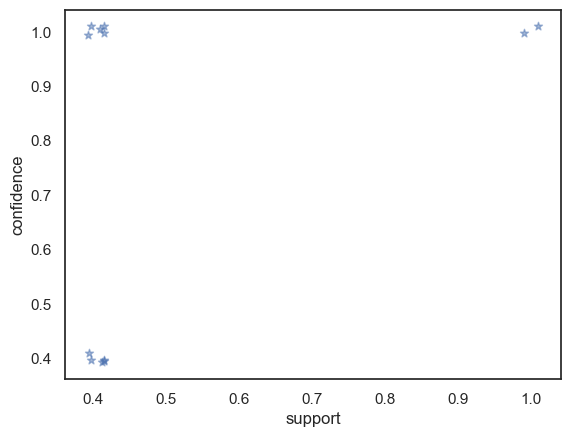

In [77]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [78]:
def df_graph(df_rules, no_of_rules):
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)    
    strs = ['R'+str(i) for i in range(no_of_rules)]
    
    for i in range(no_of_rules):      
        # Adding nodes for each rule
        G1.add_nodes_from(["R"+str(i)])
        
      # Adding backgrounds to nodes
        for a in df_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        
        # Adding consequents to nodes
        for c in df_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i], weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()


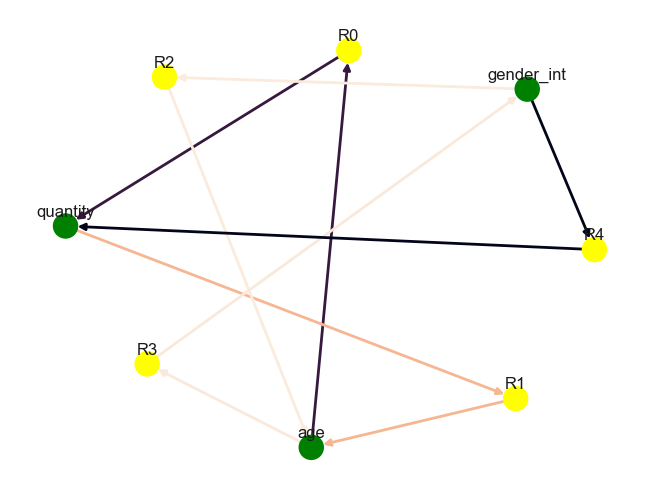

In [79]:
df_graph(df_rules,5)

In [80]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def visualize_rules(item, no_of_rules):
# Filters the rules that contain the item of interest in the antecedents or consequents
    filtered_rules = rules[rules['antecedents'].apply(lambda x: item in x) | rules['consequents'].apply(lambda x: item in x)]
    
    if filtered_rules.empty:
        print(f"No rules found for item: {item}")
        return
    
    G1 = nx.DiGraph()
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R'+str(i) for i in range(no_of_rules)]
    
  # Make sure no_of_rules does not exceed the number of available rules
    no_of_rules = min(no_of_rules, len(filtered_rules))
    
    for i in range(no_of_rules):
      # Adding nodes for each rule
        G1.add_nodes_from(["R"+str(i)])
        
      # Adding backgrounds to nodes
        for a in filtered_rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        
     # Adding consequents to nodes
        for c in filtered_rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i], weight=2)
    
    for node in G1:
        found_a_string = False
        for item in strs:
            if node == item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
    
    edges = G1.edges()
    colors = [G1[u][v]['color'] for u, v in edges]
    weights = [G1[u][v]['weight'] for u, v in edges]
    
    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color=color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)
    
    for p in pos:  
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1, pos)
    plt.show()

# Example of use
visualize_rules('Clothing', 4)

No rules found for item: Clothing


In [81]:
# Example of use
visualize_rules('Clothing', 4)

No rules found for item: Clothing


### Trending Items

In [82]:
# Check and convert the 'invoice_date' column to datetime, correcting invalid values
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Recheck data types
print(df.dtypes)

customer_id                 bool
gender                      bool
age                         bool
category                    bool
quantity                    bool
price                       bool
payment_method              bool
invoice_date      datetime64[ns]
shopping_mall               bool
gender_int                  bool
total_sales                 bool
AgeRange                    bool
age_group                   bool
month_year                  bool
total_sale                  bool
quarter                     bool
dtype: object


In [83]:
# Add a year and month column
df['year_month'] = df['invoice_date'].dt.to_period('M')

# Aggregate the number of items sold by category and per month
monthly_sales = df.groupby(['year_month', 'category']).agg({'quantity': 'sum'}).reset_index()

# Pivot the DataFrame to have categories as columns and months as indexes
monthly_sales_pivot = monthly_sales.pivot(index='year_month', columns='category', values='quantity').fillna(0)

# Check aggregated data
print("Monthly Sales Pivot Table:")
print(monthly_sales_pivot.head())

Monthly Sales Pivot Table:
Empty DataFrame
Columns: []
Index: []


In [84]:
# Calculate the change in frequency of each item from one month to the next
monthly_sales_pivot_diff = monthly_sales_pivot.diff().fillna(0)

# Check differentiation data
print("Monthly Sales Difference Table:")
print(monthly_sales_pivot_diff.head())


Monthly Sales Difference Table:
Empty DataFrame
Columns: []
Index: []


In [85]:
# Identify trending items (those with increasing frequency)
trending_items = monthly_sales_pivot_diff[monthly_sales_pivot_diff > 0].stack().reset_index()
trending_items.columns = ['year_month', 'category', 'quantity_increase']

# Check trending items
print("Trending Items:")
print(trending_items.head())

Trending Items:
Empty DataFrame
Columns: [year_month, category, quantity_increase]
Index: []


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


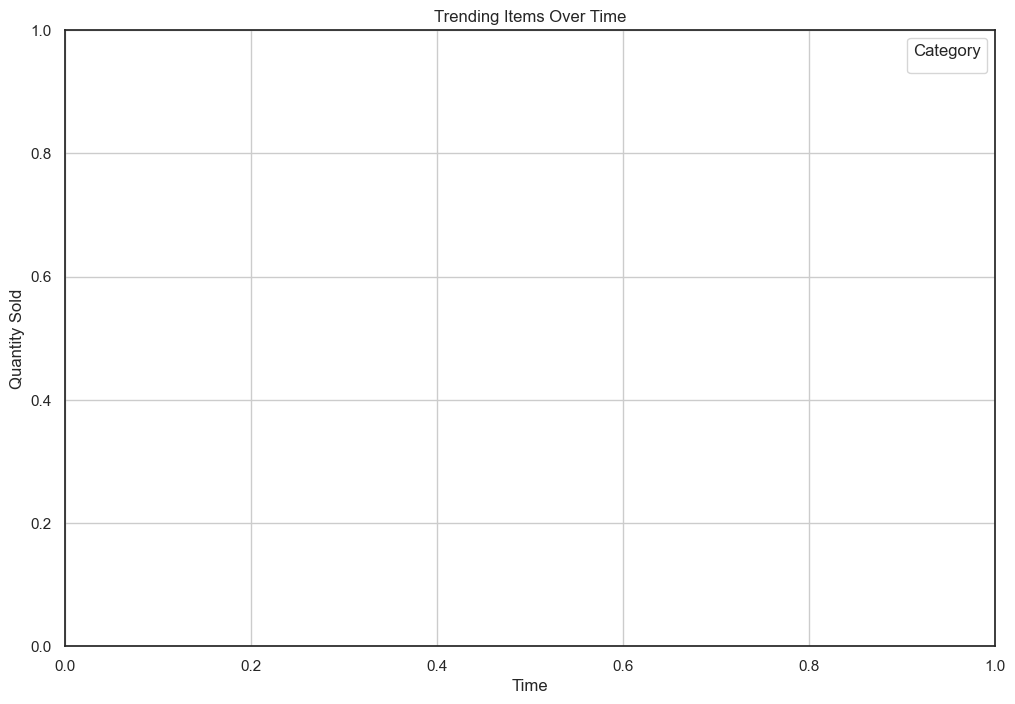

In [86]:
# Sort by largest increase in quantity
trending_items = trending_items.sort_values(by='quantity_increase', ascending=False)

# View trending items
plt.figure(figsize=(12, 8))
for category in trending_items['category'].unique():
    plt.plot(monthly_sales_pivot.index, monthly_sales_pivot[category], label=category)

plt.title('Trending Items Over Time')
plt.xlabel('Time')
plt.ylabel('Quantity Sold')
plt.legend(title='Category')
plt.grid(True)
plt.show()

# RECOMMENDATION SYSTEM 

New Dataframe abou clothing

In [112]:
data = pd.read_csv('Womens_clothing.csv')

In [113]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [114]:
data.shape

(23486, 11)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [116]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [117]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Handling missing values in datasets is crucial for machine learning because most algorithms require complete data to operate correctly and avoid bias. Proper imputation of missing values guarantees the integrity and quality of the model, directly impacting on the accuracy and effectiveness of predictions.

In [118]:
# Fill in "Title" and "Review Text" with empty string
data['Title'].fillna('', inplace=True)
data['Review Text'].fillna('', inplace=True)

# Fill in "Division Name", "Department Name", and "Class Name" with the fashion
for column in ['Division Name', 'Department Name', 'Class Name']:
    mode_value = data[column].mode()[0]
    data[column].fillna(value=mode_value, inplace=True)


data.isna().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Figure 10 shows the frequency distribution of purchases in relation to age, represented by a histogram with a superimposed density line. The graph represents age from 0 to 100. The highest peak in the histogram occurs in the 40s, which shows that the majority of customers are in this age group.There are few customers in the older age groups, but it is still possible to see significant movement up to the age of 80.
We can also say that the distribution is shifted to the left in the youngest age group, with a decrease as age increases.

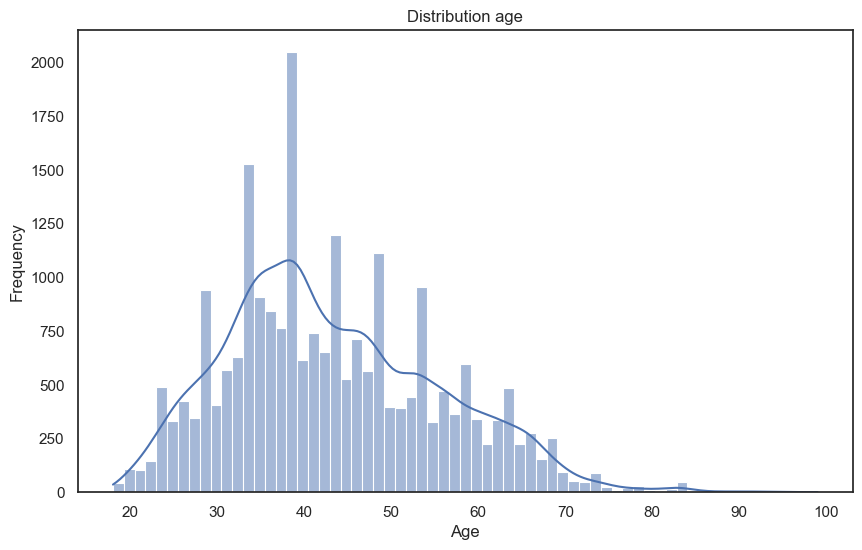

In [121]:
# Check the distribution of 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [123]:
# Create a unique product identifier if necessary
data['Class Name'] = data['Class Name']

In [124]:
# Calculating the overall average of reviews and the number of reviews
C = data['Rating'].mean()
m = data['Rating'].quantile(0.90)

In [125]:
# Filtrar roupas que têm avaliações acima do percentil 90
data_grouped = data.groupby('Class Name').agg({'Rating': ['count', 'mean']}).reset_index()
data_grouped.columns = ['Class Name', 'vote_count', 'vote_average']

In [126]:
q_clothing = data_grouped[data_grouped['vote_count'] >= m]

In [127]:
# Function that calculates the weighted score of each item of clothing
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v / (v + m) * R) + (m / (m + v) * C)

In [128]:
# Define a new feature 'score' and calculate its value with `weighted_rating`
q_clothing['score'] = q_clothing.apply(weighted_rating, axis=1)

# Show the first rows of results
q_clothing.sort_values(by='score', ascending=False).head(25)

C:\Users\karik\AppData\Local\Temp\ipykernel_17904\476026405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_clothing['score'] = q_clothing.apply(weighted_rating, axis=1)


,Class Name,vote_count,vote_average,score
9,Layering,146,4.376712,4.370730
7,Jeans,1147,4.360942,4.360226
11,Lounge,691,4.301013,4.300259
6,Jackets,704,4.295455,4.294753
16,Sleep,228,4.285088,4.283177
5,Intimates,154,4.279221,4.276605
10,Legwear,165,4.278788,4.276354
13,Pants,1388,4.265850,4.265600
4,Fine gauge,1100,4.260909,4.260616
14,Shorts,317,4.255521,4.254597


## Content-Based Recommender

In [129]:
# Replace NaN with an empty string in the 'Review Text' column
data['Review Text'] = data['Review Text'].fillna('')

In [130]:
# Print plot overviews of the first 10 movies.
data['Review Text'].head(10)

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
5    I love tracy reese dresses, but this one is no...
6    I aded this in my basket at hte last mintue to...
7    I ordered this in carbon for store pick up, an...
8    I love this dress. i usually get an xs but it ...
9    I'm 5"5' and 125 lbs. i ordered the s petite t...
Name: Review Text, dtype: object

In [131]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Replace NaN with an empty string in the 'Review Text' column
data['Review Text'] = data['Review Text'].fillna('')

# Define a TF-IDF Vectorizer object, removing all English stop words
tfidf = TfidfVectorizer(stop_words='english')

# Build the TF-IDF matrix, adjusting and transforming the data
tfidf_matrix = tfidf.fit_transform(data['Review Text'])

# Output the shape of tfidf_matrix
print("Shape of TF-IDF Matrix:", tfidf_matrix.shape)

Shape of TF-IDF Matrix: (23486, 13855)


In [132]:
# Checks the total number of generated features
total_features = len(tfidf.get_feature_names_out())
print("Total number of features:", total_features)

Total number of features: 13855


In [133]:
# Array mapping from feature integer indices to feature name.
# In this code snippet, the [5000:5010] slice is used to get the feature names for the indices between 5000 and 5010 (exclusive).
tfidf.get_feature_names_out()[5000:5010]

array(['floppy', 'flops', 'flora', 'floraknit', 'floral', 'florals',
       'florascura', 'floreat', 'florescent', 'florida'], dtype=object)

In [134]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix[:10000], tfidf_matrix[:10000])

In [135]:
cosine_sim.shape

(10000, 10000)

In [136]:
cosine_sim[1]

array([0.        , 1.        , 0.08844617, ..., 0.02626265, 0.06550124,
       0.04286934])

In [137]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(data.index, index=data['Class Name']).drop_duplicates()

In [138]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return data['Clothing ID'].iloc[movie_indices]

In [139]:
get_recommendations(767)

6587    1078
2326    1094
7504    1075
8111    1078
6097    1081
6543    1095
7947    1099
9511    1075
5024     977
2986    1082
Name: Clothing ID, dtype: int64

# Collaborative Filtering

In [140]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [142]:
# Create a unique identifier 'user_id' by combining 'Clothing ID' and 'Age'
data['user_id'] = data['Clothing ID'].astype(str) + '_' + data['Age'].astype(str)

# Prepare columns for collaborative filtering
X = data[['user_id', 'Clothing ID', 'Rating']]

# Split data into training and testing sets
train, test = train_test_split(X, test_size=0.2, random_state=42)

# Create the utility matrix for the training set
train_data_matrix = train.pivot_table(index='user_id', columns='Clothing ID', values='Rating', fill_value=0)

# Check how the utility matrix turned out
print(train_data_matrix.head())

Clothing ID  1     2     3     4     5     6     7     8     9     12    ...  \
user_id                                                                  ...   
1000_24         0     0     0     0     0     0     0     0     0     0  ...   
1000_55         0     0     0     0     0     0     0     0     0     0  ...   
1001_22         0     0     0     0     0     0     0     0     0     0  ...   
1001_23         0     0     0     0     0     0     0     0     0     0  ...   
1001_26         0     0     0     0     0     0     0     0     0     0  ...   

Clothing ID  1196  1197  1198  1199  1200  1201  1202  1203  1204  1205  
user_id                                                                  
1000_24         0     0     0     0     0     0     0     0   0.0     0  
1000_55         0     0     0     0     0     0     0     0   0.0     0  
1001_22         0     0     0     0     0     0     0     0   0.0     0  
1001_23         0     0     0     0     0     0     0     0   0.0    

In [143]:
# Create the training set utility matrix
train_data_matrix = train.pivot_table(index='user_id', columns='Clothing ID', values='Rating', fill_value=0)

In [144]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity based on training utility matrix
user_similarity = cosine_similarity(train_data_matrix)

import numpy as np

def predict(ratings, similarity):
    mean_user_rating = ratings.mean(axis=1)
    ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
    pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred

# Use the prediction function
user_predictions = predict(train_data_matrix.values, user_similarity)

# Create the test utility matrix for evaluation
test_data_matrix = test.pivot_table(index='user_id', columns='Clothing ID', values='Rating', fill_value=0)

# Evaluation using specific metrics, e.g., RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

# Convert predictions to the correct format to compare with the test matrix
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()  
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()  
    return sqrt(mean_squared_error(prediction, ground_truth))

# Evaluate RMSE
error = rmse(user_predictions, test_data_matrix.values)
print(f'RMSE: {error}')

RMSE: 4.304570483566131


Em suma, o RMSE é uma ferramenta valiosa para medir a precisão dos modelos de previsão, ajudando a identificar quão bem um modelo pode esperar performar em condições práticas, quantificando os erros em termos compreensíveis

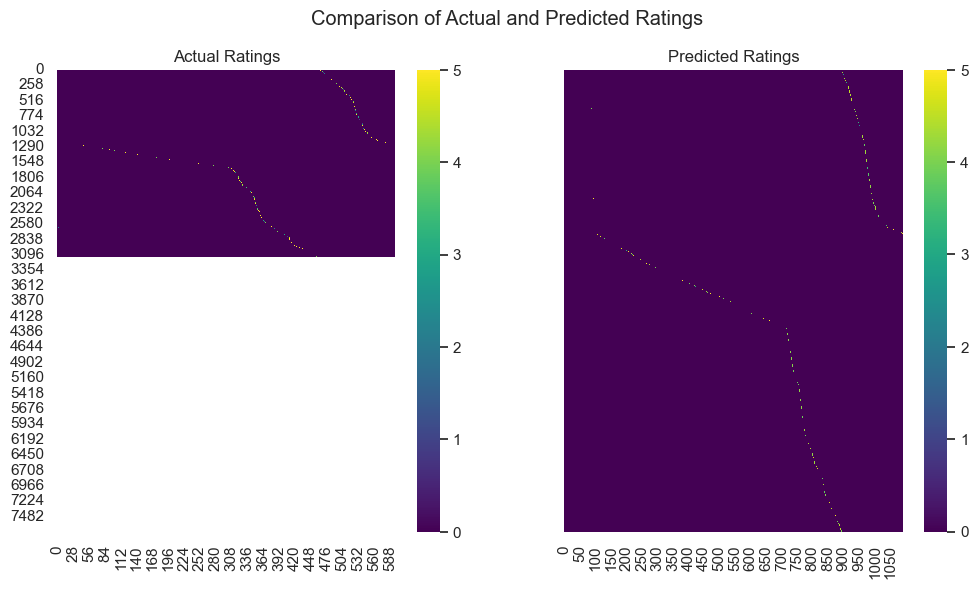

In [149]:
# Convert DataFrame to a numpy array if needed:
test_matrix_np = test_data_matrix.values 

# Now applying nonzero correctly:
predicted_ratings = user_predictions[test_matrix_np.nonzero()].flatten()
actual_ratings = test_matrix_np[test_matrix_np.nonzero()].flatten()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.heatmap(test_matrix_np, ax=ax[0], cmap='viridis')
ax[0].set_title('Actual Ratings')
sns.heatmap(user_predictions, ax=ax[1], cmap='viridis')
ax[1].set_title('Predicted Ratings')
plt.suptitle('Comparison of Actual and Predicted Ratings')
plt.show()

# Recommentation KNN

In [150]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

In [151]:
# Utilizar 'Clothing ID' como identificador de item
user_ids = data['user_id'].astype('category').cat.codes.values  # Certifique-se de que 'user_id' está correto
item_ids = data['Clothing ID'].astype('category').cat.codes.values  # Usar 'Clothing ID' como identificador de item
ratings = data['Rating'].values  # Ajustar caso 'Rating' seja chamada de outra forma

# Obter o número de usuários e itens
n_users = data['user_id'].nunique()
n_items = data['Clothing ID'].nunique()

# Criar a matriz esparsa CSR
ratings_matrix = csr_matrix((ratings, (user_ids, item_ids)), shape=(n_users, n_items))

print("Shape of matrix: ", ratings_matrix.shape)

Shape of matrix:  (8802, 1206)


In [152]:
# Configurar o KNN para usar a métrica de cosseno
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)

# Treinar o modelo
model_knn.fit(ratings_matrix)

# Exemplo de busca de vizinhos para o primeiro usuário/item
distances, indices = model_knn.kneighbors(ratings_matrix[0], n_neighbors=5)
print("Distâncias:", distances)
print("Índices:", indices)

Distâncias: [[0. 1. 1. 1. 1.]]
Índices: [[   0 5870 5871 5872 5869]]


KNN can be used to predict user preferences and recommend items based on the similarity of ratings between users or items. With the heat map we can visualise how similar the items are to each other on a scale of 0 to 1, where 1 indicates maximum similarity and 0 indicates no similarity. And each of the coloured parts of the map shows similarity; the red colour here indicates that there is strong similarity, while the lighter colours show less similarity. So this is effective for identifying sales patterns, such as which products are bought together



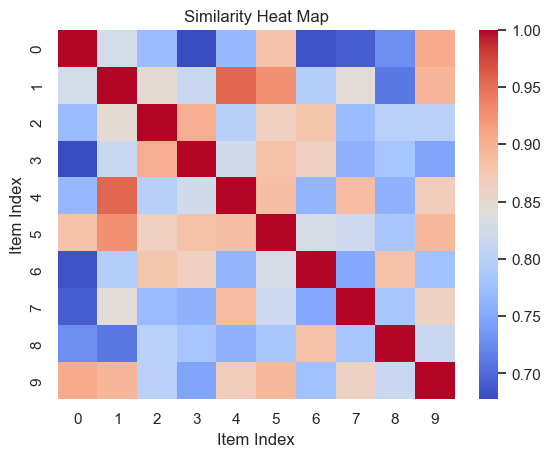

In [157]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Example data matrix
data_matrix = np.random.rand(10, 10) 

# Compute the similarity matrix
similarities = cosine_similarity(data_matrix)

# Now you can safely plot the heatmap
sns.heatmap(similarities, cmap='coolwarm')
plt.title('Similarity Heat Map')
plt.xlabel('Item Index')
plt.ylabel('Item Index')
plt.show()